In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class style:
    BOLD = '\033[1m'
    END = '\033[0m'

import warnings
warnings.filterwarnings("ignore")

In [2]:
%run Functions.ipynb

In [3]:
df = pd.read_csv('../Kaggle Survey/Data/multiple_choice_responses.csv')

In [4]:
df.drop(index=0,inplace=True)

In [5]:
df.head()

Time from Start to Finish (seconds)     Q1      Q2 Q2_OTHER_TEXT         Q3  \
1                                 510  22-24    Male            -1     France   
2                                 423  40-44    Male            -1      India   
3                                  83  55-59  Female            -1    Germany   
4                                 391  40-44    Male            -1  Australia   
5                                 392  22-24    Male            -1      India   

                    Q4                 Q5 Q5_OTHER_TEXT                    Q6  \
1      Master’s degree  Software Engineer            -1  1000-9,999 employees   
2  Professional degree  Software Engineer            -1    > 10,000 employees   
3  Professional degree                NaN            -1                   NaN   
4      Master’s degree              Other             0    > 10,000 employees   
5    Bachelor’s degree              Other             1        0-49 employees   

    Q7  ... Q34_Part_4 Q34_Part_5 Q34_Part_6 Q34_Part_7 Q34_Part_8  \
1    0  ...        NaN        NaN        NaN        NaN        NaN   
2  20+  ...        NaN        NaN        NaN        NaN        NaN   
3  NaN  ...        NaN        NaN        NaN        NaN        NaN   
4  20+  ...        NaN        NaN        NaN        NaN        NaN   
5    0  ...        NaN        NaN        NaN        NaN        NaN   

           Q34_Part_9 Q34_Part_10 Q34_Part_11 Q34_Part_12 Q34_OTHER_TEXT  
1                 NaN         NaN         NaN         NaN             -1  
2                 NaN         NaN         NaN         NaN             -1  
3                 NaN         NaN         NaN         NaN             -1  
4  Azure SQL Database         NaN         NaN         NaN             -1  
5                 NaN         NaN         NaN         NaN             -1  

[5 rows x 246 columns]

In [105]:
def multi_response_table1(df,cols,top_break,title):
    import numpy as np
    class style:
        BOLD = '\033[1m'
        END = '\033[0m'

    if top_break in cols:
        cols.remove(top_break)
        df_list = list()
        for i in cols:
            df_list.append(pd.DataFrame(df.groupby(top_break)[i].value_counts().unstack()))

        df_table=pd.concat(df_list,axis=1)

        cols.append(top_break)
        dummy_df = df[cols]
        dummy_df['Base'] = df[cols[:-1]].count(axis=1)

        dummy_df['Base_Final'] = dummy_df['Base'].apply(lambda x : 1 if x>0 else 0)

        #     df_2 = pd.DataFrame(dummy_df.groupby(top_break)['Base_Final'].sum()).T.append(df_table.T)
        #     df_2 = dummy_df.pivot_table(index=top_break,values='Base_Final',aggfunc=np.sum).T.append(df_table.T)
        df1 = dummy_df.pivot_table(index=top_break,values='Base_Final',aggfunc=np.sum)
        df_2 = df1.T.append(df_table.T)

        #     All = pd.DataFrame(pd.DataFrame(dummy_df.groupby(top_break)['Base_Final'].sum()).T.append(df_table.T).sum(axis=1))
        All = pd.DataFrame(dummy_df.pivot_table(index=top_break,values='Base_Final',aggfunc=np.sum).T.append(df_table.T).sum(axis=1))
        All.rename(columns={0:'All'},inplace=True)

        df_Final_table = pd.concat([All,df_2],axis=1)

        print(style.BOLD + title + style.END)

        return df_Final_table
    else:
        df_list = list()
        for i in cols:
            df_list.append(pd.DataFrame(df.groupby(top_break)[i].value_counts().unstack()))

        df_table=pd.concat(df_list,axis=1)

        cols.append(top_break)
        dummy_df = df[cols]
        dummy_df['Base'] = df[cols[:-1]].count(axis=1)

        dummy_df['Base_Final'] = dummy_df['Base'].apply(lambda x : 1 if x>0 else 0)

        #     df_2 = pd.DataFrame(dummy_df.groupby(top_break)['Base_Final'].sum()).T.append(df_table.T)
        #     df_2 = dummy_df.pivot_table(index=top_break,values='Base_Final',aggfunc=np.sum).T.append(df_table.T)
        df1 = dummy_df.pivot_table(index=top_break,values='Base_Final',aggfunc=np.sum)
        df_2 = df1.T.append(df_table.T)

        #     All = pd.DataFrame(pd.DataFrame(dummy_df.groupby(top_break)['Base_Final'].sum()).T.append(df_table.T).sum(axis=1))
        All = pd.DataFrame(dummy_df.pivot_table(index=top_break,values='Base_Final',aggfunc=np.sum).T.append(df_table.T).sum(axis=1))
        All.rename(columns={0:'All'},inplace=True)

        df_Final_table = pd.concat([All,df_2],axis=1)


        print(style.BOLD + title + style.END)
        return df_Final_table

In [7]:
var_list = ['Q9_Part_1','Q9_Part_2','Q9_Part_3','Q9_Part_4','Q9_Part_5','Q9_Part_6','Q9_Part_7','Q9_Part_8']
top_break = 'Q1'

Q9_table = multi_response_table_fixed(df,var_list,top_break,
                      "activities that make up an important part of your role at work: (Select all that apply)")

activities that make up an important part of your role at work: (Select all that apply)


In [8]:
# Q9_table

# Q9_table.T.
round(Q9_table.ix[1:].divide(round(Q9_table.ix[0]))*100)

All  18-21  22-24  25-29  \
Analyze and understand data to influence produc...  66.0   58.0   61.0   68.0   
Build and/or run the data infrastructure that m...  39.0   35.0   36.0   39.0   
Build prototypes to explore applying machine le...  54.0   40.0   44.0   51.0   
Build and/or run a machine learning service tha...  36.0   32.0   34.0   39.0   
Experimentation and iteration to improve existi...  40.0   30.0   37.0   42.0   
Do research that advances the state of the art ...  26.0   28.0   24.0   25.0   
None of these activities are an important part ...   6.0    3.0    7.0    5.0   
Other                                                3.0    3.0    3.0    2.0   

                                                    30-34  35-39  40-44  \
Analyze and understand data to influence produc...   67.0   68.0   68.0   
Build and/or run the data infrastructure that m...   40.0   41.0   41.0   
Build prototypes to explore applying machine le...   60.0   59.0   58.0   
Build and/or run a machine learning service tha...   39.0   39.0   35.0   
Experimentation and iteration to improve existi...   42.0   42.0   43.0   
Do research that advances the state of the art ...   24.0   26.0   26.0   
None of these activities are an important part ...    6.0    6.0    6.0   
Other                                                 2.0    3.0    2.0   

                                                    45-49  50-54  55-59  \
Analyze and understand data to influence produc...   63.0   64.0   68.0   
Build and/or run the data infrastructure that m...   40.0   37.0   37.0   
Build prototypes to explore applying machine le...   54.0   54.0   62.0   
Build and/or run a machine learning service tha...   32.0   29.0   28.0   
Experimentation and iteration to improve existi...   37.0   37.0   43.0   
Do research that advances the state of the art ...   26.0   25.0   33.0   
None of these activities are an important part ...    8.0    5.0    3.0   
Other                                                 4.0    2.0    4.0   

                                                    60-69   70+  
Analyze and understand data to influence produc...   68.0  44.0  
Build and/or run the data infrastructure that m...   32.0  24.0  
Build prototypes to explore applying machine le...   56.0  44.0  
Build and/or run a machine learning service tha...   29.0  15.0  
Experimentation and iteration to improve existi...   38.0  22.0  
Do research that advances the state of the art ...   28.0  37.0  
None of these activities are an important part ...    4.0  10.0  
Other                                                 5.0   7.0

In [9]:
df['All'] = 1
df.pivot_table(index='Q8',columns='Q1',values='All',aggfunc=len,margins=True)

Q1                                                  18-21  22-24  25-29  \
Q8                                                                        
I do not know                                          96    203    273   
No (we do not use ML methods)                          48    274    572   
We are exploring ML methods (and may one day pu...    133    415    650   
We have well established ML methods (i.e., mode...     65    289    629   
We recently started using ML methods (i.e., mod...     89    381    749   
We use ML methods for generating insights (but ...     56    196    386   
All                                                   487   1758   3259   

Q1                                                  30-34  35-39  40-44  \
Q8                                                                        
I do not know                                         195    127     96   
No (we do not use ML methods)                         448    335    262   
We are exploring ML methods (and may one day pu...    494    377    243   
We have well established ML methods (i.e., mode...    548    367    233   
We recently started using ML methods (i.e., mod...    574    357    241   
We use ML methods for generating insights (but ...    302    213    159   
All                                                  2561   1776   1234   

Q1                                                  45-49  50-54  55-59  \
Q8                                                                        
I do not know                                          81     38     34   
No (we do not use ML methods)                         188    127     88   
We are exploring ML methods (and may one day pu...    177    156     81   
We have well established ML methods (i.e., mode...    155    110     67   
We recently started using ML methods (i.e., mod...    151    104     53   
We use ML methods for generating insights (but ...     83     72     34   
All                                                   835    607    357   

Q1                                                  60-69  70+    All  
Q8                                                                     
I do not know                                          36   12   1191  
No (we do not use ML methods)                          50   23   2415  
We are exploring ML methods (and may one day pu...     70   16   2812  
We have well established ML methods (i.e., mode...     55   10   2528  
We recently started using ML methods (i.e., mod...     28    4   2731  
We use ML methods for generating insights (but ...     38   11   1550  
All                                                   277   76  13227

In [10]:
df.pivot_table(index='Q7',columns='Q1',values='All',aggfunc=len,margins=True)

Q1     18-21   22-24   25-29   30-34   35-39   40-44  45-49  50-54  55-59  \
Q7                                                                          
0      119.0   266.0   427.0   316.0   239.0   173.0  140.0   90.0   51.0   
1-2    111.0   396.0   709.0   571.0   383.0   264.0  193.0  163.0  106.0   
10-14   34.0   110.0   268.0   186.0   138.0    86.0   52.0   43.0   26.0   
15-19   14.0    52.0   117.0    93.0    57.0    43.0   20.0   19.0    6.0   
20+     84.0   399.0   739.0   649.0   463.0   340.0  210.0  124.0   90.0   
3-4    105.0   346.0   609.0   452.0   273.0   200.0  134.0  102.0   52.0   
5-9     63.0   268.0   483.0   362.0   256.0   159.0  106.0   81.0   28.0   
All    530.0  1837.0  3352.0  2629.0  1809.0  1265.0  855.0  622.0  359.0   

Q1     60-69   70+    All  
Q7                         
0       37.0  22.0   1880  
1-2     84.0  25.0   3005  
10-14   21.0   3.0    967  
15-19    6.0   NaN    427  
20+     66.0  14.0   3178  
3-4     37.0   9.0   2319  
5-9     34.0   7.0   1847  
All    285.0  80.0  13623

In [11]:
df.pivot_table(index='Q7',columns='Q2',values='All',aggfunc=len,margins=True)

Q2     Female   Male  Prefer not to say  Prefer to self-describe    All
Q7                                                                     
0         287   1554                 34                        5   1880
1-2       393   2554                 50                        8   3005
10-14     149    802                 14                        2    967
15-19      70    348                  6                        3    427
20+       495   2623                 51                        9   3178
3-4       354   1941                 22                        2   2319
5-9       274   1545                 26                        2   1847
All      2022  11367                203                       31  13623

In [12]:
df['Q1'].value_counts()

25-29    4458
22-24    3610
30-34    3120
18-21    2502
35-39    2087
40-44    1439
45-49     949
50-54     692
55-59     422
60-69     338
70+       100
Name: Q1, dtype: int64

In [13]:
import matplotlib.pyplot as plt
designation_Gender = df.pivot_table(index='Q5',columns='Q2',values='All',aggfunc=len,margins=True)
designation_Gender.columns

Index(['Female', 'Male', 'Prefer not to say', 'Prefer to self-describe',
       'All'],
      dtype='object', name='Q2')

<Figure size 720x360 with 0 Axes>

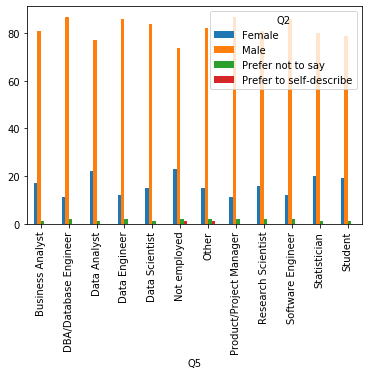

In [14]:
designation_Gender_per = round(designation_Gender[['Female', 'Male', 'Prefer not to say', 'Prefer to self-describe']].div(designation_Gender['All'],axis=0)*100,0)
designation_Gender_per.drop(index='All',inplace=True)
plt.figure(figsize=(10,5))
designation_Gender_per.plot(kind='bar')
plt.show()

In [15]:
import seaborn as sns
designation_Gender_per.reset_index(inplace=True)
desgn_plot = pd.melt(designation_Gender_per, id_vars='Q5', var_name="sex", value_name="Employment Ratio")

<Figure size 720x720 with 0 Axes>

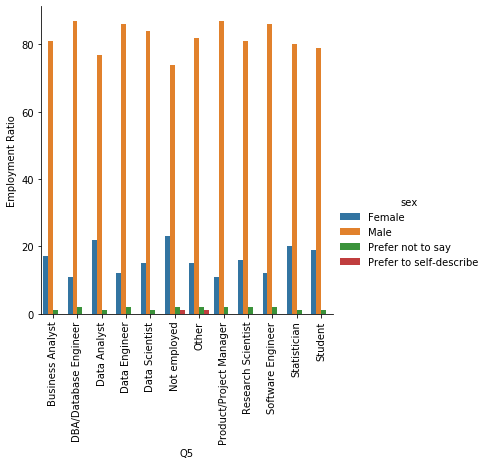

In [16]:
plt.figure(figsize=(10,10))
sns.factorplot(x='Q5', y='Employment Ratio', hue='sex', data=desgn_plot, kind='bar')
plt.xticks(rotation=90)
plt.show()

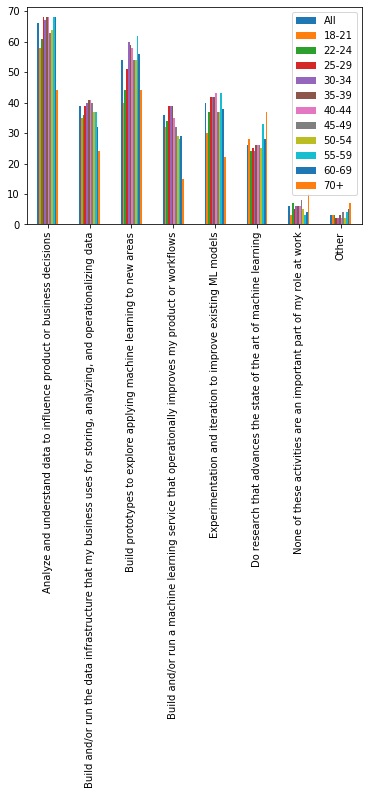

In [17]:
round(Q9_table.ix[1:].divide(round(Q9_table.ix[0]))*100).plot(kind='bar')

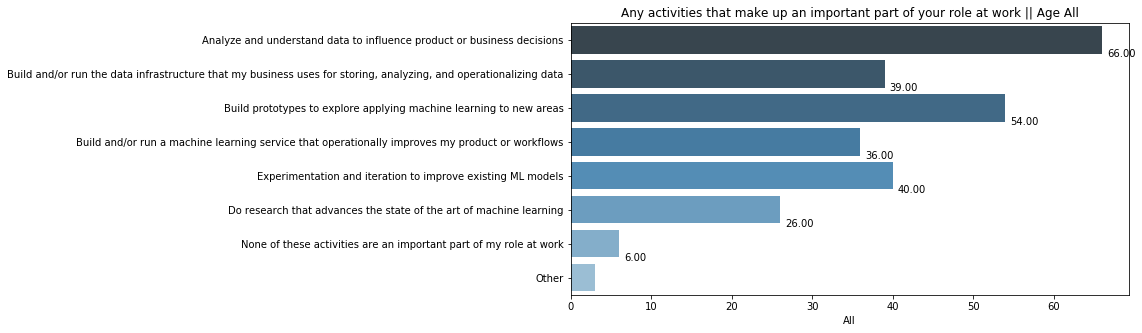

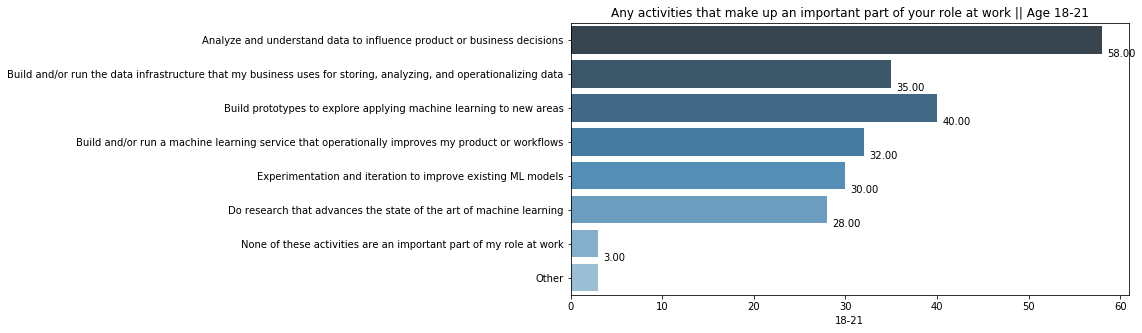

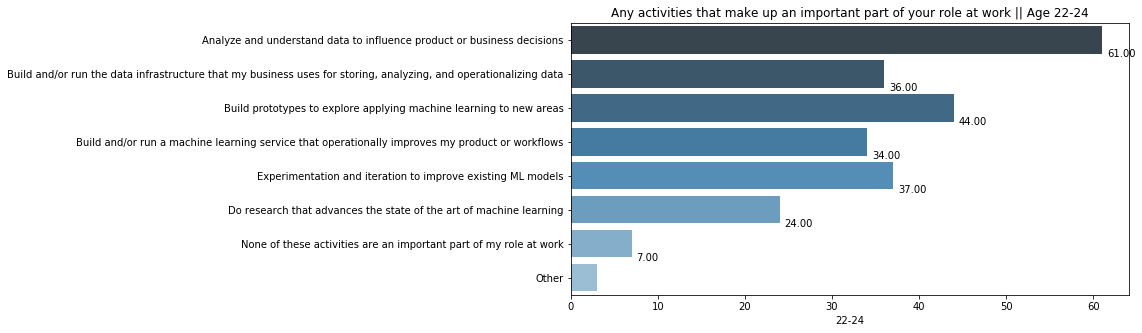

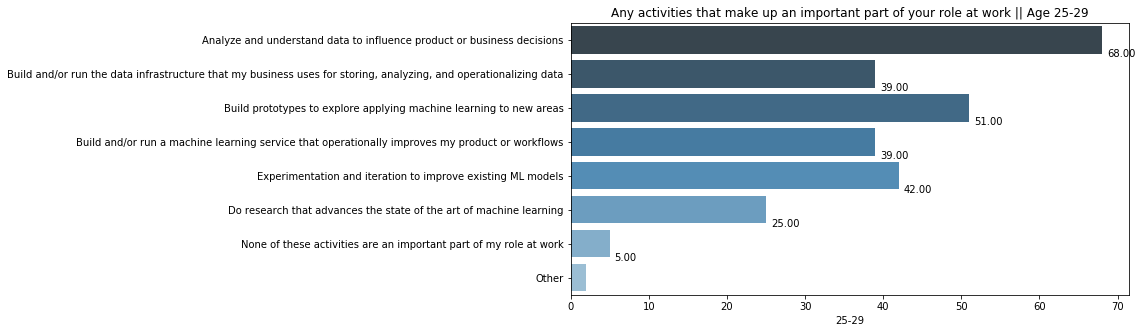

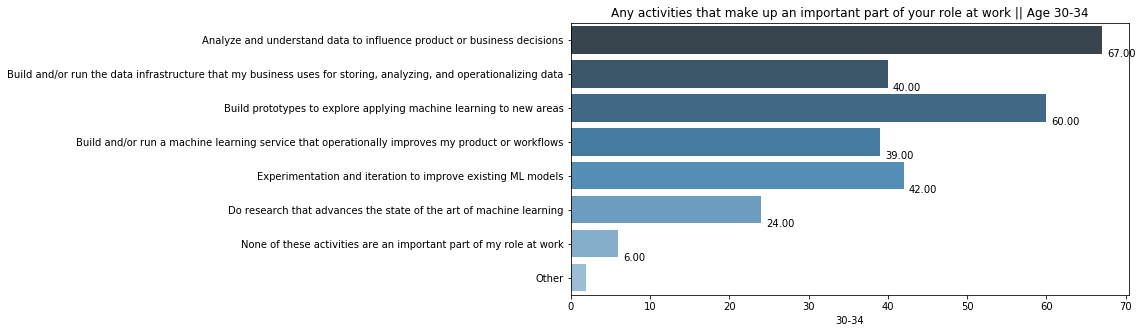

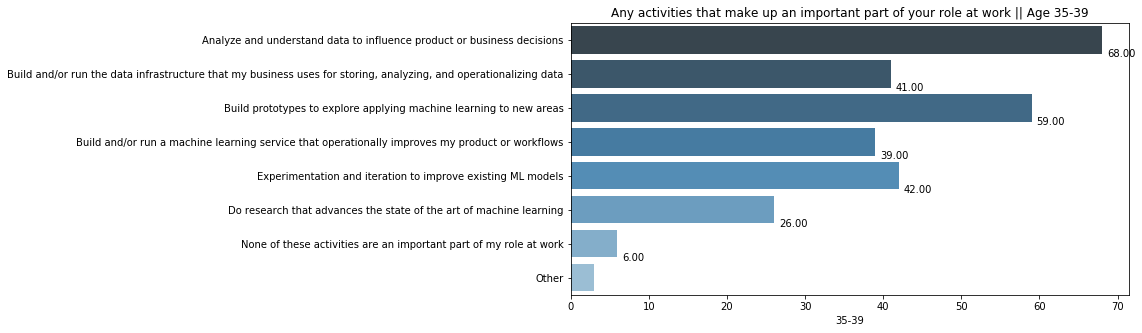

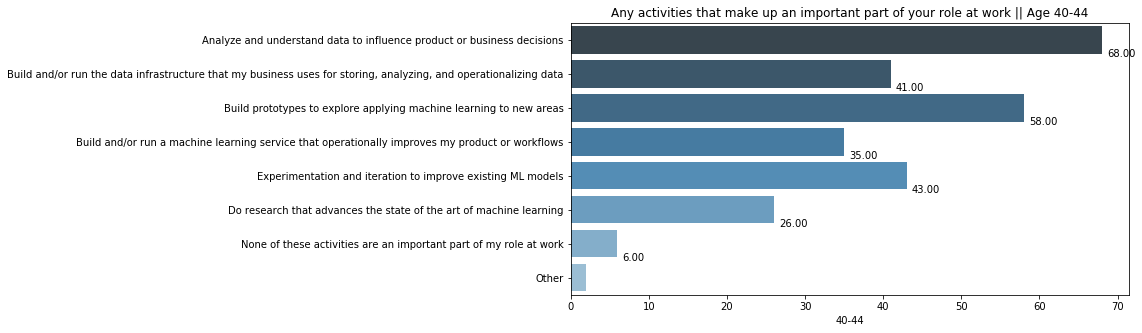

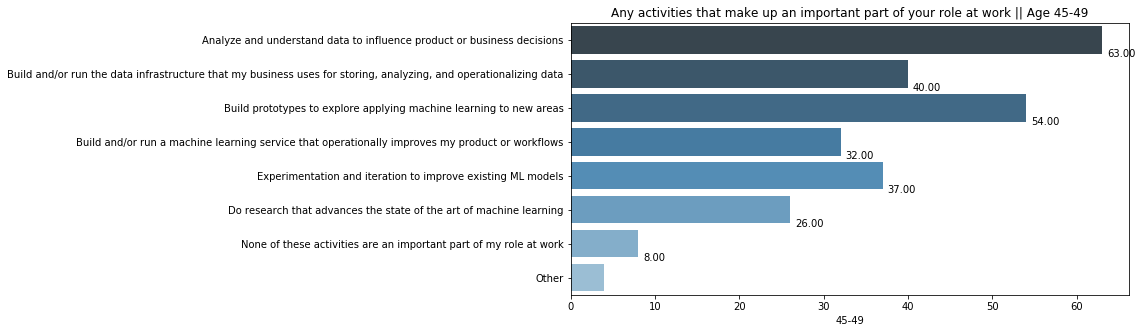

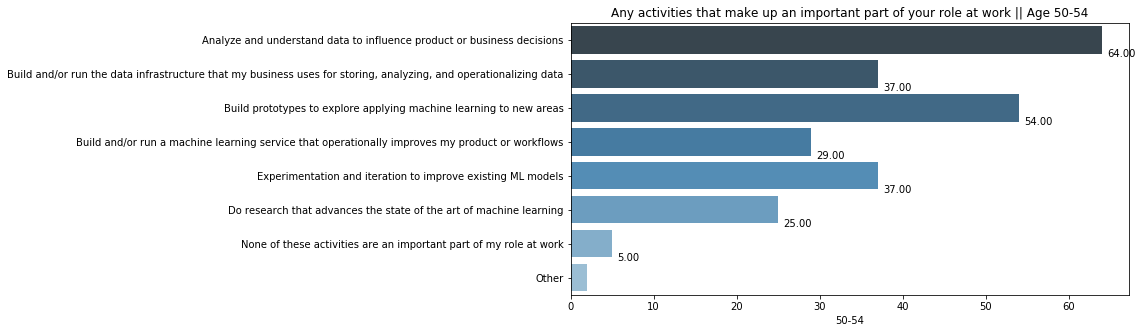

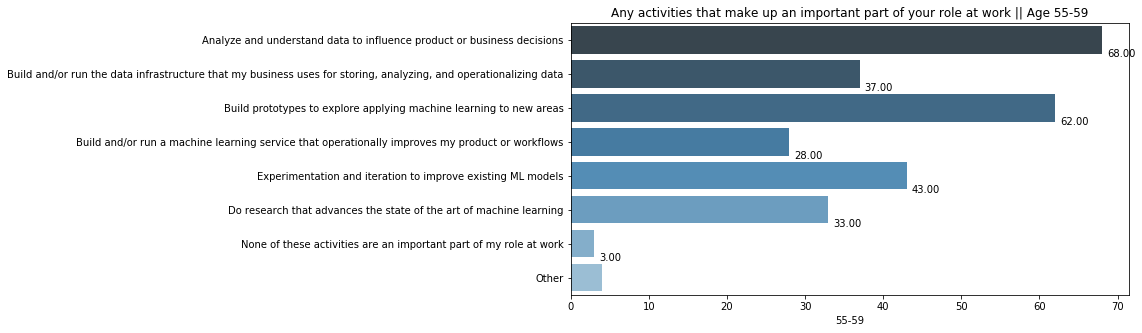

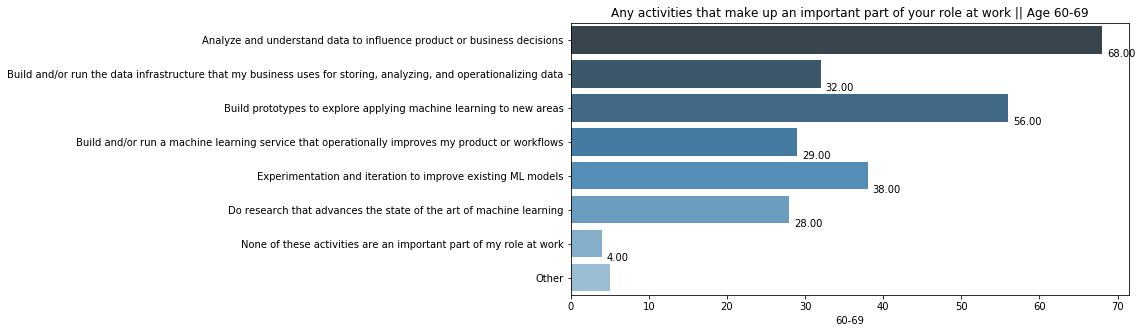

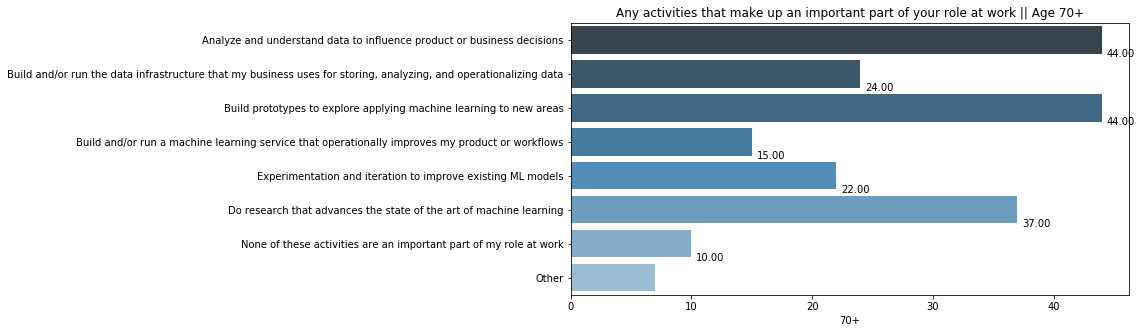

In [18]:
Q9_table_per = round(Q9_table.ix[1:].divide(round(Q9_table.ix[0]))*100)
Q9_table_per

cols = list(Q9_table_per.columns)
for col in cols:
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=col,y=Q9_table_per.index,data=Q9_table_per,palette='Blues_d',orient='h')
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                    xytext=(5, 10), textcoords='offset points')
    plt.title('Any activities that make up an important part of your role at work || Age ' + col)
    plt.show()
# style.BOLD + title + style.END

In [19]:
df_India = df[df['Q3']=='India']

In [20]:
df_India

Time from Start to Finish (seconds)     Q1    Q2 Q2_OTHER_TEXT     Q3  \
2                                     423  40-44  Male            -1  India   
5                                     392  22-24  Male            -1  India   
7                                     529  22-24  Male            -1  India   
11                                    290  18-21  Male            -1  India   
15                                    524  25-29  Male            -1  India   
...                                   ...    ...   ...           ...    ...   
19711                                  85  22-24  Male            -1  India   
19712                                 157  18-21  Male            -1  India   
19714                                 473  18-21  Male            -1  India   
19715                                9195  35-39  Male            -1  India   
19716                                 176  25-29  Male            -1  India   

                                                      Q4                 Q5  \
2                                    Professional degree  Software Engineer   
5                                      Bachelor’s degree              Other   
7                                        Master’s degree     Data Scientist   
11     Some college/university study without earning ...            Student   
15                                     Bachelor’s degree              Other   
...                                                  ...                ...   
19711                                  Bachelor’s degree     Data Scientist   
19712                                    Master’s degree            Student   
19714                                  Bachelor’s degree              Other   
19715                                    Master’s degree            Student   
19716                                    Master’s degree       Statistician   

      Q5_OTHER_TEXT                    Q6     Q7  ... Q34_Part_5 Q34_Part_6  \
2                -1    > 10,000 employees    20+  ...        NaN        NaN   
5                 1        0-49 employees      0  ...        NaN        NaN   
7                -1      50-249 employees    20+  ...        NaN        NaN   
11               -1                   NaN    NaN  ...        NaN        NaN   
15                3  1000-9,999 employees    NaN  ...        NaN        NaN   
...             ...                   ...    ...  ...        ...        ...   
19711            -1      50-249 employees    NaN  ...        NaN        NaN   
19712            -1                   NaN    NaN  ...        NaN        NaN   
19714            -1     250-999 employees    3-4  ...        NaN        NaN   
19715            -1                   NaN    NaN  ...        NaN        NaN   
19716            -1      50-249 employees  15-19  ...        NaN        NaN   

      Q34_Part_7 Q34_Part_8 Q34_Part_9 Q34_Part_10 Q34_Part_11 Q34_Part_12  \
2            NaN        NaN        NaN         NaN         NaN         NaN   
5            NaN        NaN        NaN         NaN         NaN         NaN   
7            NaN        NaN        NaN         NaN         NaN         NaN   
11           NaN        NaN        NaN         NaN         NaN         NaN   
15           NaN        NaN        NaN         NaN         NaN         NaN   
...          ...        ...        ...         ...         ...         ...   
19711        NaN        NaN        NaN         NaN         NaN         NaN   
19712        NaN        NaN        NaN         NaN         NaN         NaN   
19714        NaN        NaN        NaN         NaN         NaN         NaN   
19715        NaN        NaN        NaN         NaN         NaN         NaN   
19716        NaN        NaN        NaN         NaN         NaN         NaN   

      Q34_OTHER_TEXT All  
2                 -1   1  
5                 -1   1  
7                 -1   1  
11                -1   1  
15                -1   1  
...              ...  ..  
19711             -1   1  
19712 

In [21]:
Q9_table = multi_response_table_fixed(df_India,var_list,top_break,
                      "activities that make up an important part of your role at work: (Select all that apply)")

activities that make up an important part of your role at work: (Select all that apply)


In [22]:
Q9_table_per = round(Q9_table.ix[1:].divide(round(Q9_table.ix[0]))*100)
Q9_table_per

All  18-21  22-24  25-29  \
Analyze and understand data to influence produc...  61.0   53.0   57.0   65.0   
Build and/or run the data infrastructure that m...  33.0   37.0   33.0   34.0   
Build prototypes to explore applying machine le...  45.0   38.0   39.0   47.0   
Build and/or run a machine learning service tha...  37.0   35.0   35.0   42.0   
Experimentation and iteration to improve existi...  38.0   32.0   36.0   40.0   
Do research that advances the state of the art ...  29.0   33.0   27.0   28.0   
None of these activities are an important part ...   8.0    4.0   10.0    8.0   
Other                                                3.0    4.0    3.0    1.0   

                                                    30-34  35-39  40-44  \
Analyze and understand data to influence produc...   61.0   62.0   60.0   
Build and/or run the data infrastructure that m...   31.0   33.0   32.0   
Build prototypes to explore applying machine le...   47.0   48.0   57.0   
Build and/or run a machine learning service tha...   36.0   39.0   31.0   
Experimentation and iteration to improve existi...   37.0   42.0   32.0   
Do research that advances the state of the art ...   26.0   35.0   33.0   
None of these activities are an important part ...    9.0    8.0    8.0   
Other                                                 4.0    4.0    4.0   

                                                    45-49  50-54  55-59  \
Analyze and understand data to influence produc...   78.0   55.0   83.0   
Build and/or run the data infrastructure that m...   36.0   36.0   33.0   
Build prototypes to explore applying machine le...   62.0   41.0   67.0   
Build and/or run a machine learning service tha...   44.0   32.0   50.0   
Experimentation and iteration to improve existi...   38.0   41.0   50.0   
Do research that advances the state of the art ...   40.0   27.0   50.0   
None of these activities are an important part ...    4.0    5.0    NaN   
Other                                                 NaN   14.0    NaN   

                                                    60-69    70+  
Analyze and understand data to influence produc...   57.0  100.0  
Build and/or run the data infrastructure that m...   29.0    NaN  
Build prototypes to explore applying machine le...   71.0    NaN  
Build and/or run a machine learning service tha...   14.0    NaN  
Experimentation and iteration to improve existi...   29.0    NaN  
Do research that advances the state of the art ...   57.0    NaN  
None of these activities are an important part ...    NaN    NaN  
Other                                                 NaN    NaN

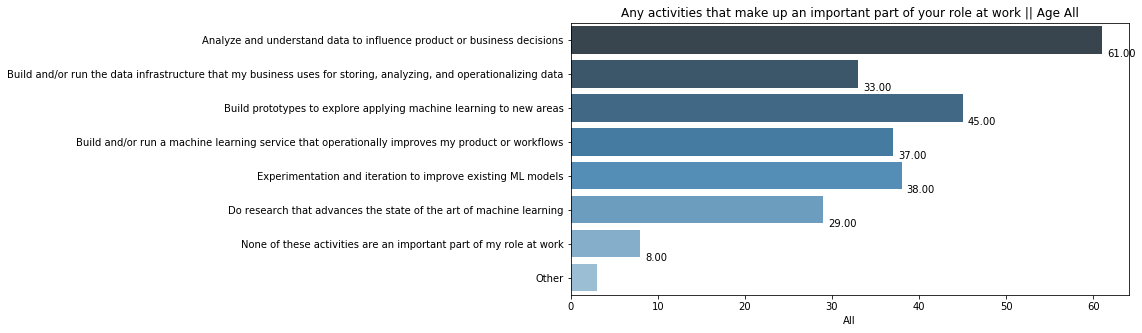

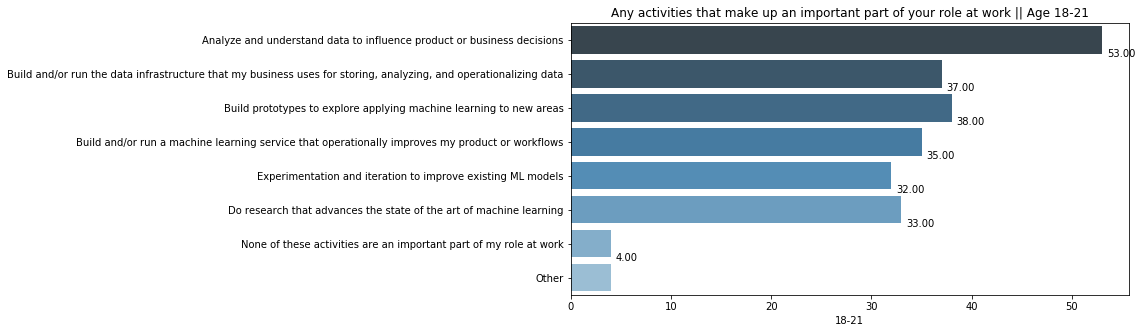

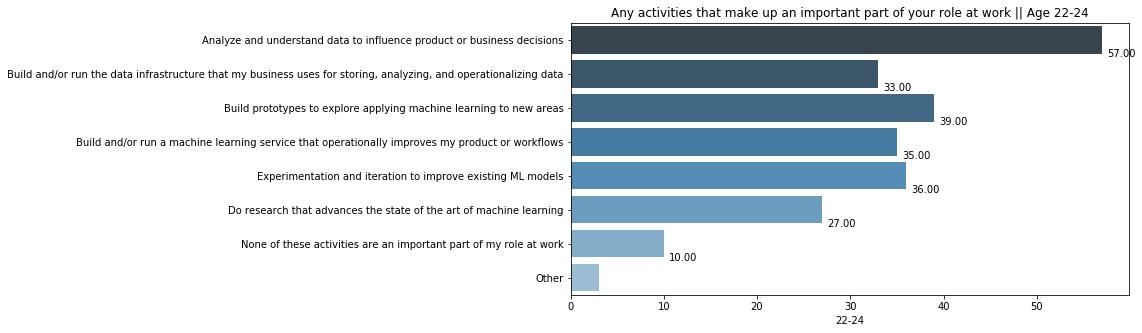

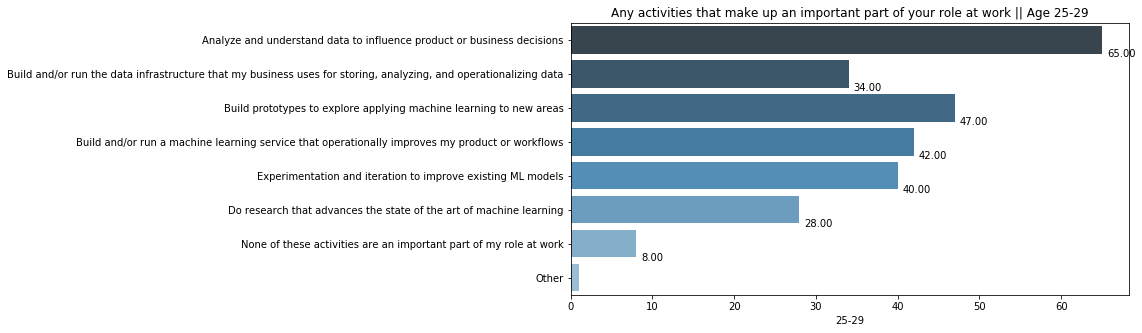

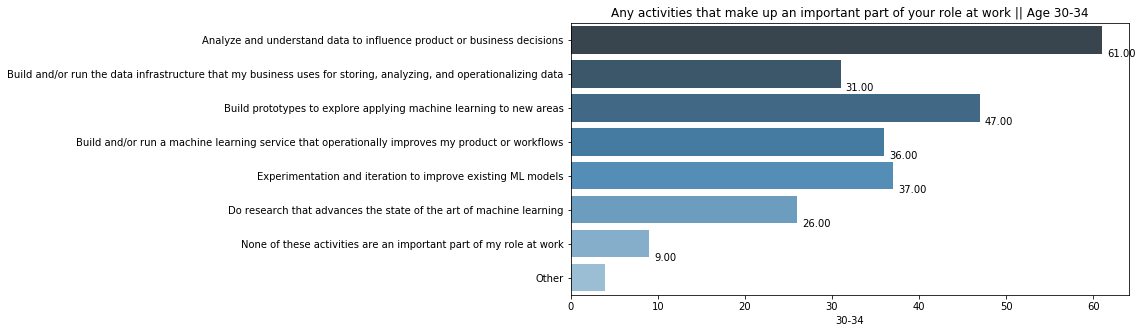

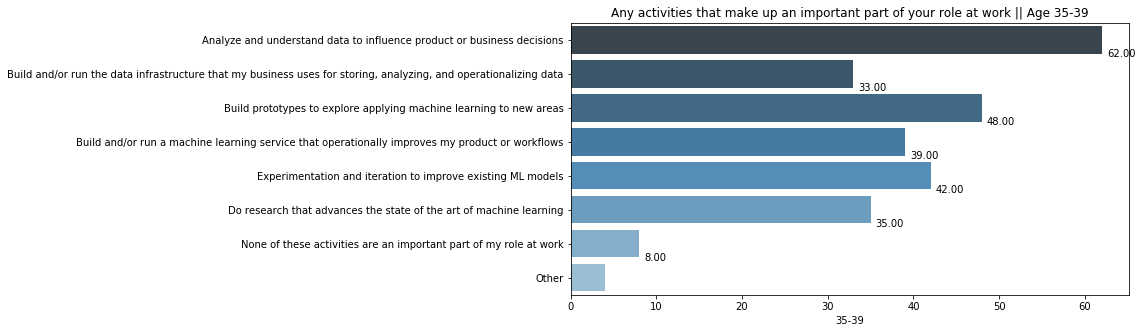

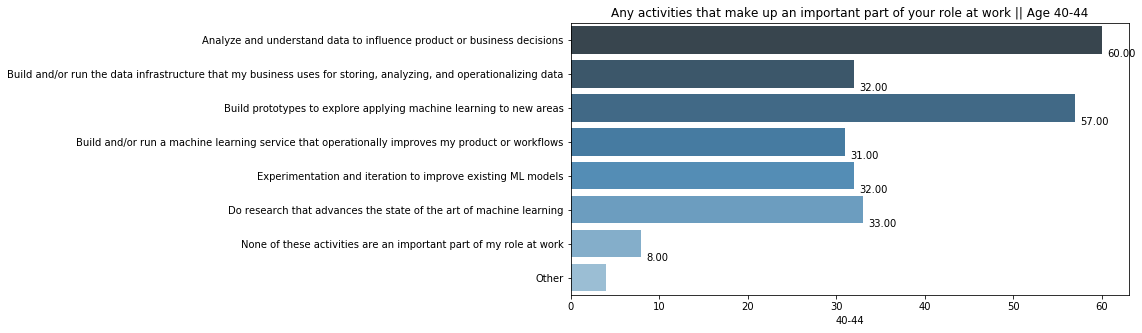

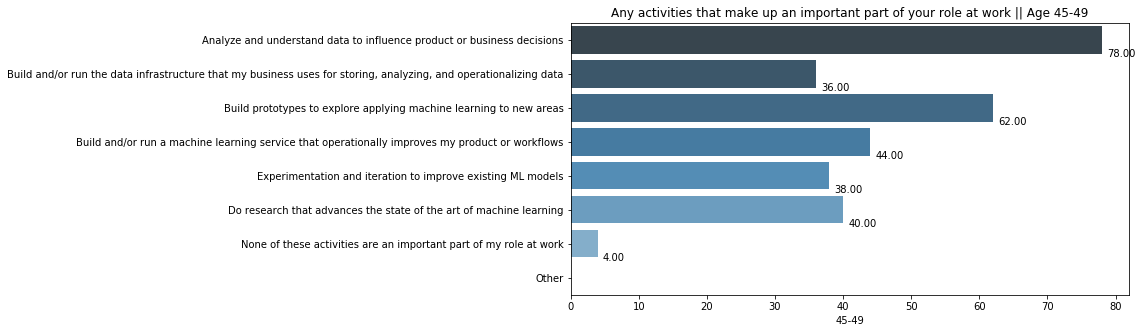

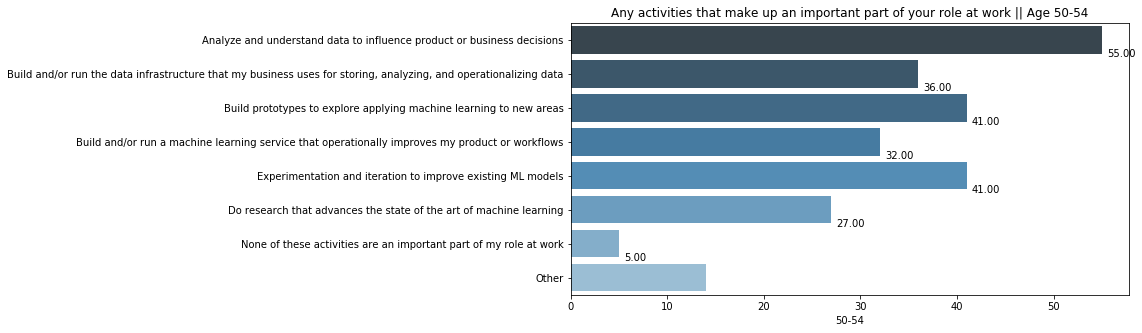

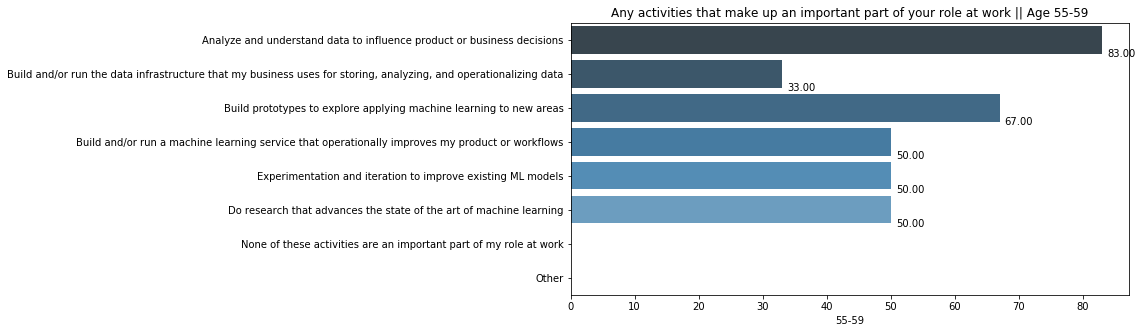

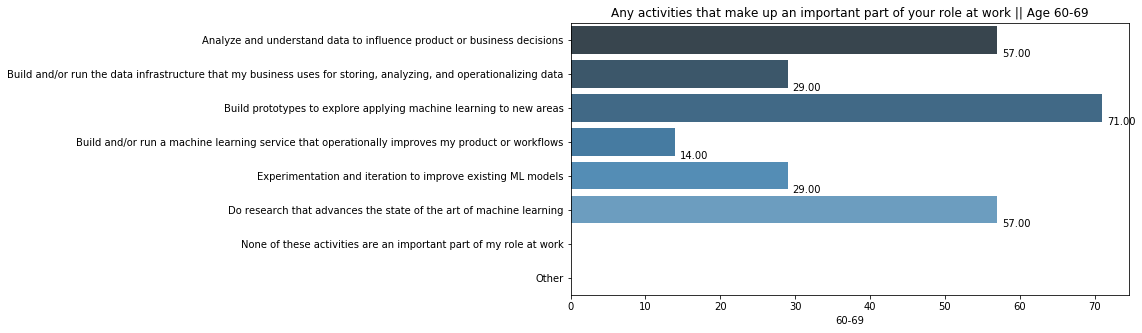

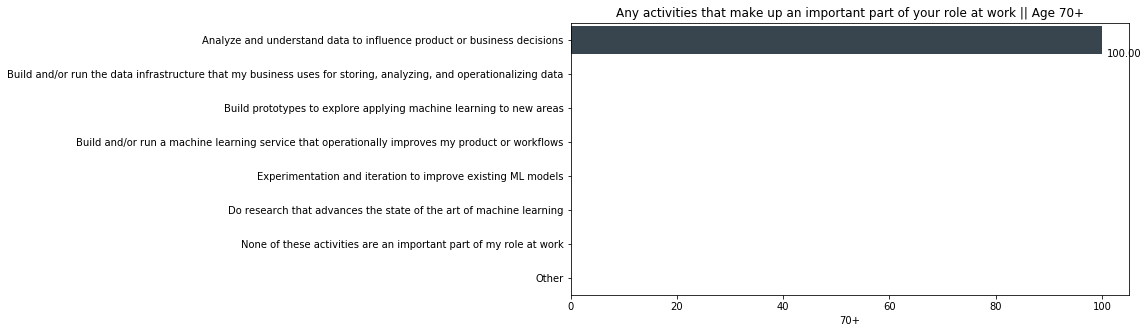

In [23]:
cols = list(Q9_table_per.columns)
for col in cols:
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=col,y=Q9_table_per.index,data=Q9_table_per,palette='Blues_d',orient='h')
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                    xytext=(5, 10), textcoords='offset points')
    plt.title('Any activities that make up an important part of your role at work || Age ' + col)
    plt.show()


In [24]:
round((df['Q3'].value_counts()/len(df))*100,2)

India                                                   24.27
United States of America                                15.65
Other                                                    5.35
Brazil                                                   3.69
Japan                                                    3.41
Russia                                                   3.17
China                                                    2.91
Germany                                                  2.69
United Kingdom of Great Britain and Northern Ireland     2.44
Canada                                                   2.28
Spain                                                    2.02
Nigeria                                                  2.00
France                                                   1.96
Taiwan                                                   1.53
Turkey                                                   1.46
Italy                                                    1.37
Australi

In [25]:
df.pivot_table(index='Q3',columns='Q2',values='All',aggfunc=len,margins=True)

Q2                                                  Female     Male  \
Q3                                                                    
Algeria                                               12.0     46.0   
Argentina                                             13.0    108.0   
Australia                                             44.0    218.0   
Austria                                                5.0     47.0   
Bangladesh                                             7.0    127.0   
Belarus                                               12.0     55.0   
Belgium                                                5.0     62.0   
Brazil                                                79.0    643.0   
Canada                                                99.0    334.0   
Chile                                                 10.0     81.0   
China                                                 84.0    469.0   
Colombia                                              18.0    149.0   
Czech Republic                                         8.0     49.0   
Denmark                                                3.0     49.0   
Egypt                                                 27.0     94.0   
France                                                53.0    324.0   
Germany                                               91.0    432.0   
Greece                                                15.0     93.0   
Hong Kong (S.A.R.)                                    12.0     52.0   
Hungary                                                5.0     51.0   
India                                                771.0   3958.0   
Indonesia                                             38.0    127.0   
Iran, Islamic Republic of...                          28.0     67.0   
Ireland                                               22.0     65.0   
Israel                                                16.0     88.0   
Italy                                                 27.0    236.0   
Japan                                                 54.0    612.0   
Kenya                                                 29.0     85.0   
Malaysia                                              22.0     53.0   
Mexico                                                25.0    167.0   
Morocco                                               27.0     96.0   
Netherlands                                           17.0    143.0   
New Zealand                                           10.0     41.0   
Nigeria                                               63.0    330.0   
Norway                                                 2.0     48.0   
Other                                                159.0    842.0   
Pakistan                                              37.0    172.0   
Peru                                                   8.0     66.0   
Philippines                                           19.0     41.0   
Poland                                                31.0    177.0   
Portugal                                              20.0     92.0   
Republic of Korea                                     11.0     62.0   
Romania                                               12.0     46.0   
Russia                                                77.0    543.0   
Saudi Arabia                                          10.0     40.0   
Singapore                                             21.0    132.0   
South Africa                                          19.0     99.0   
South Korea                                           36.0    144.0   
Spain                                                 52.0    340.0   
Sweden                                                13.0     75.0   
Switzerland                                           15.0     79.0   
Taiwan                                                42.0    250.0   
Thailand                                              15.0     51.0   
Tunisia                                               33.0     35.0   
Turkey                  

In [52]:
pd.DataFrame(df.isnull().sum()).to_excel('../Kaggle Survey/Data_Null_Response_Count.xlsx')

In [26]:
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

# Graphics in retina format
%config InlineBackend.figure_format = 'retina'

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 5, 5
#plt.rcParams['image.cmap'] = 'viridis'

# palette of colors to be used for plots
colors = ["steelblue","dodgerblue","lightskyblue","powderblue","cyan","deepskyblue",
          "cyan","darkturquoise","paleturquoise","turquoise"]


In [27]:
# Helper functions

def return_count(data,question_part):
    """Counts occurences of each value in a given column"""
    counts_df = data[question_part].value_counts().to_frame()
    return counts_df

def return_percentage(data,question_part):
    """Calculates percent of each value in a given column"""
    total = data[question_part].count()
    counts_df= data[question_part].value_counts().to_frame()
    percentage_df = (counts_df*100)/total
    return percentage_df


    
def plot_graph(data,question,title,x_axis_title,y_axis_title):
    """ plots a percentage bar graph"""
    df = return_percentage(data,question)
    
    trace1 = go.Bar(
                    x = df.index,
                    y = df[question],
                    #orientation='h',
                    marker = dict(color='dodgerblue',
                                 line=dict(color='black',width=1)),
                    text = df.index)
    data = [trace1]
    layout = go.Layout(barmode = "group",title=title,width=800, height=500,
                       xaxis=dict(type='category',categoryorder='array',categoryarray=salary_order,title=y_axis_title),
                       yaxis= dict(title=x_axis_title))
                       
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

In [28]:
# Splitting all the datasets genderwise
male_2019 = df[df['Q2']=='Male']
female_2019 = df[df['Q2']=='Female']


# Top-10 Countries with Respondents in 2019
topn = 10
count_male = male_2019['Q3'].value_counts()[:topn].reset_index()
count_female = female_2019['Q3'].value_counts()[:topn].reset_index()



In [29]:
pie_men = go.Pie(labels=count_male['index'],values=count_male['Q3'],name="Men",hole=0.4,domain={'x': [0,0.46]})
pie_women = go.Pie(labels=count_female['index'],values=count_female['Q3'],name="Women",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Top-10 Countries with Respondents in 2019', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Men', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Women', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_men, pie_women], layout=layout)
py.iplot(fig)


In [30]:
male_edu = male_2019['Q4'].value_counts().reset_index()
female_edu = female_2019['Q4'].value_counts().reset_index()
count_education = df['Q4'].value_counts().reset_index()

In [33]:
pie_edu = go.Pie(labels=count_education['index'],values=count_education['Q4'],name="Education",
                 hole=0.4,domain={'x': [0.46,0.9]})

pie_male_edu = go.Pie(labels=male_edu['index'],values=male_edu['Q4'],name="Education",
                 hole=0.4,domain={'x': [0,0.46]})

pie_female_edu = go.Pie(labels=female_edu['index'],values=female_edu['Q4'],name="Education",
                 hole=0.4,domain={'x': [0.52,1]})

layout = dict(title = 'Education of  Respondents in 2019', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Men', showarrow=False, font=dict(size=20)),
                             dict(x=0.81, y=0.5, text='Women', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_male_edu,pie_female_edu], layout=layout)
py.iplot(fig)

In [34]:
top10_country = df['Q3'].value_counts()[:10].index.tolist()
edu_by_country = df.pivot_table(index='Q4',columns='Q3',values='All',aggfunc=len)
edu_by_country.reset_index(inplace=True)

In [35]:
for col in top10_country:
    pie_male_edu = go.Pie(labels=edu_by_country['Q4'],values=edu_by_country[col],name="Education",
                     hole=0.4,domain={'x': [0,0.46]})

    layout = dict(title = 'Education of  Respondents in 2019', font=dict(size=10), legend=dict(orientation="h"),
                  annotations = [dict(x=0.2, y=0.5, text=col, showarrow=False, font=dict(size=20)) ])

    fig = dict(data=[pie_male_edu], layout=layout)
    py.iplot(fig)

In [36]:
edu_by_country.set_index('Q4',inplace=True)
edu_by_country[top10_country]

Q3                                                   India  \
Q4                                                           
Bachelor’s degree                                   2321.0   
Doctoral degree                                      251.0   
I prefer not to answer                                96.0   
Master’s degree                                     1683.0   
No formal education past high school                  26.0   
Professional degree                                  204.0   
Some college/university study without earning a...   128.0   

Q3                                                  United States of America  \
Q4                                                                             
Bachelor’s degree                                                      702.0   
Doctoral degree                                                        631.0   
I prefer not to answer                                                  18.0   
Master’s degree                                                       1520.0   
No formal education past high school                                    13.0   
Professional degree                                                     31.0   
Some college/university study without earning a...                     125.0   

Q3                                                  Other  Brazil  Japan  \
Q4                                                                         
Bachelor’s degree                                   275.0   248.0  152.0   
Doctoral degree                                     151.0    98.0   80.0   
I prefer not to answer                               33.0     9.0   21.0   
Master’s degree                                     448.0   283.0  302.0   
No formal education past high school                 29.0     7.0   19.0   
Professional degree                                  28.0    33.0    6.0   
Some college/university study without earning a...   65.0    37.0   54.0   

Q3                                                  Russia  China  Germany  \
Q4                                                                           
Bachelor’s degree                                    113.0  144.0     72.0   
Doctoral degree                                       79.0   64.0    145.0   
I prefer not to answer                                21.0   13.0      5.0   
Master’s degree                                      292.0  283.0    269.0   
No formal education past high school                  30.0    2.0      4.0   
Professional degree                                   43.0    9.0      9.0   
Some college/university study without earning a...    29.0   30.0     17.0   

Q3                                                  United Kingdom of Great Britain and Northern Ireland  \
Q4                                                                                                         
Bachelor’s degree                                                                               104.0      
Doctoral degree                                                                                 140.0      
I prefer not to answer                                                                            3.0      
Master’s degree                                                                                 191.0      
No formal education past high school                                                              9.0      
Professional degree                                                                              11.0      
Some college/university study without earning a...                                               20.0      

Q3                                                  Canada  
Q4                                                          
Bachelor’s degree                                    136.0  
Doctoral degree                                       87.0  
I prefer not to answer                                 8.0  
Master’s degree                                      1

In [37]:
for i in top10_country:
    edu_by_country[i] = round(edu_by_country[i]/sum(edu_by_country[i])*100,2)

In [38]:
edu_by_country[top10_country].T.sort_values(by="Master’s degree",ascending=False)

Q4                                                  Bachelor’s degree  \
Q3                                                                      
China                                                           26.42   
Germany                                                         13.82   
United States of America                                        23.09   
Russia                                                          18.62   
Japan                                                           23.97   
Other                                                           26.72   
United Kingdom of Great Britain and Northern Ir...              21.76   
Brazil                                                          34.69   
Canada                                                          30.56   
India                                                           49.29   

Q4                                                  Doctoral degree  \
Q3                                                                    
China                                                         11.74   
Germany                                                       27.83   
United States of America                                      20.76   
Russia                                                        13.01   
Japan                                                         12.62   
Other                                                         14.67   
United Kingdom of Great Britain and Northern Ir...            29.29   
Brazil                                                        13.71   
Canada                                                        19.55   
India                                                          5.33   

Q4                                                  I prefer not to answer  \
Q3                                                                           
China                                                                 2.39   
Germany                                                               0.96   
United States of America                                              0.59   
Russia                                                                3.46   
Japan                                                                 3.31   
Other                                                                 3.21   
United Kingdom of Great Britain and Northern Ir...                    0.63   
Brazil                                                                1.26   
Canada                                                                1.80   
India                                                                 2.04   

Q4                                                  Master’s degree  \
Q3                                                                    
China                                                         51.93   
Germany                                                       51.63   
United States of America                                      50.00   
Russia                                                        48.11   
Japan                                                         47.63   
Other                                                         43.54   
United Kingdom of Great Britain and Northern Ir...            39.96   
Brazil                                                        39.58   
Canada                                                        38.65   
India                                                         35.74   

Q4                                                  No formal education past high school  \
Q3                                                                                         
China                                                                               0.37   
Germany                                                                             0.77   
United States of America                                                            0.43   
Russia              

In [39]:
Masters_degree = pd.DataFrame(edu_by_country[top10_country].T["Master’s degree"]).sort_values(by="Master’s degree",ascending=False)

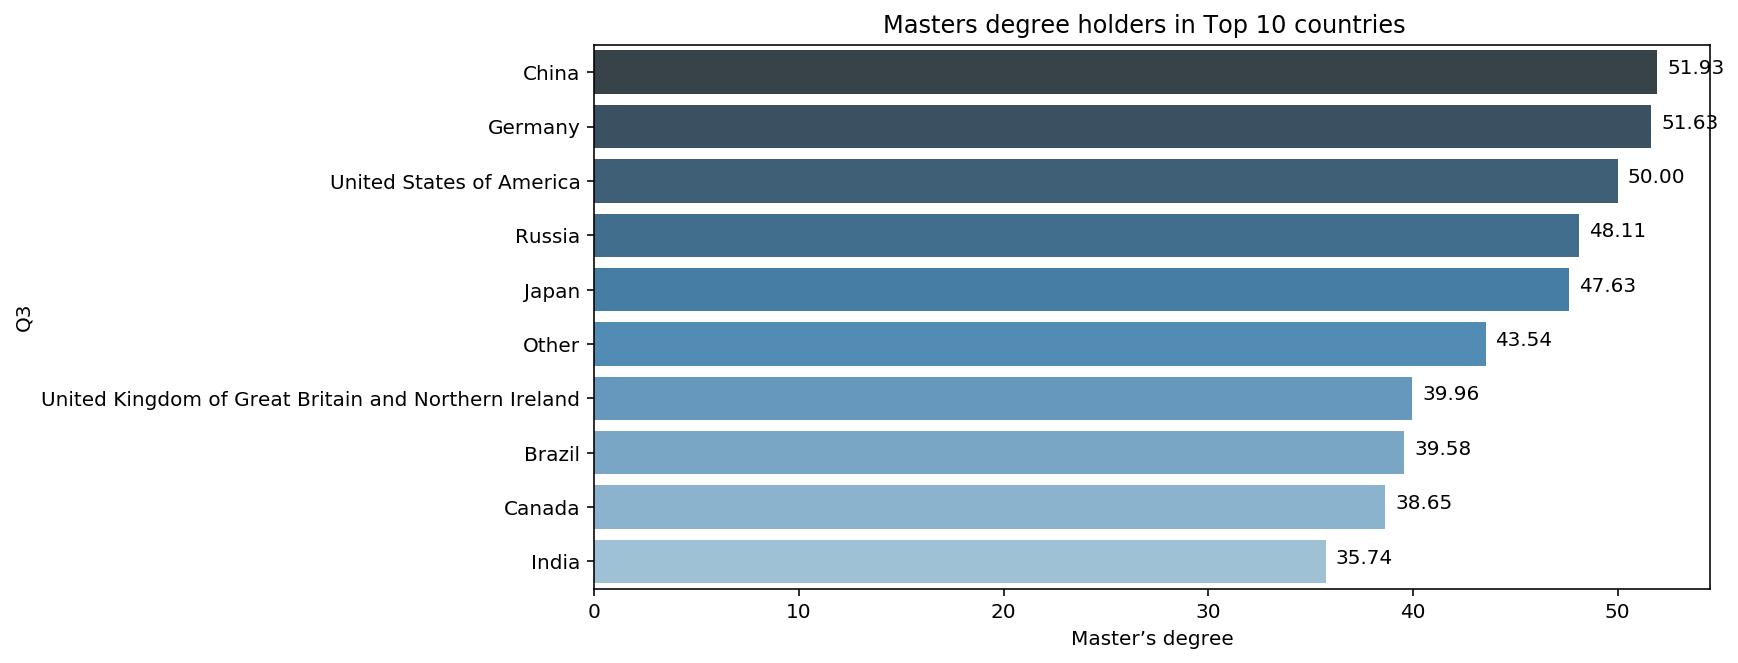

In [40]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=Masters_degree["Master’s degree"],y=Masters_degree.index,data=Q9_table_per,palette='Blues_d',orient='h')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.8),
                xytext=(5, 10), textcoords='offset points')
plt.title('Masters degree holders in Top 10 countries  ')
plt.show()

In [41]:
x = Masters_degree["Master’s degree"].index
y = Masters_degree["Master’s degree"].values


# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x,
            y=y,
            text=y,
            width=0.4,
            textposition='auto',
            marker=dict(color='green')
 )])

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"
fig.update_layout(yaxis=dict(title='Number of Respondents(%)'),width=700,height=500,
                  title='Masters degree holders in top 10 countries',
                  xaxis=dict(title='Country'))
fig.show()


In [42]:
# df[df['Q3']=='United States of America'].pivot_table(index='Q4',columns='Q5',values='All',aggfunc=len)
degree_vs_job_overall = df.pivot_table(index='Q4',columns='Q5',values='All',aggfunc=len)
cols = degree_vs_job_overall.columns.tolist()
for i in cols:
    degree_vs_job_overall[i] = round((degree_vs_job_overall[i]/sum(degree_vs_job_overall[i]))*100,2)

# Highlighting cells having percentange greater than 50    
degree_vs_job_overall.style.apply(lambda x: ["background: lightgreen" if v > 50 else "" for v in x], axis = 1)

In [43]:
degree_vs_job_USA = df[df['Q3']=='United States of America'].pivot_table(index='Q4',columns='Q5',values='All',aggfunc=len)
# degree_vs_job_USA = df.pivot_table(index='Q4',columns='Q5',values='All',aggfunc=len)
cols = degree_vs_job_USA.columns.tolist()
degree_vs_job_USA.fillna(0,inplace=True)
for i in cols:
    degree_vs_job_USA[i] = round((degree_vs_job_USA[i]/sum(degree_vs_job_USA[i]))*100,2)

# Highlighting cells having percentange greater than 50    
degree_vs_job_USA.style.apply(lambda x: ["background: lightgreen" if v > 50 else "" for v in x], axis = 1)

In [44]:
for i in top10_country:
    degree_vs_job = df[df['Q3']==i].pivot_table(index='Q4',columns='Q5',values='All',aggfunc=len)
    # degree_vs_job_USA = df.pivot_table(index='Q4',columns='Q5',values='All',aggfunc=len)
    cols = degree_vs_job.columns.tolist()
    degree_vs_job.fillna(0,inplace=True)
    for i in cols:
        degree_vs_job[i] = round((degree_vs_job[i]/sum(degree_vs_job[i]))*100,2)

    # Highlighting cells having percentange greater than 50    
    degree_vs_job.style.apply(lambda x: ["background: lightgreen" if v > 50 else "" for v in x], axis = 1)

In [45]:
i='India'
degree_vs_job = df[df['Q3']==i].pivot_table(index='Q4',columns='Q5',values='All',aggfunc=len)
# degree_vs_job_USA = df.pivot_table(index='Q4',columns='Q5',values='All',aggfunc=len)
cols = degree_vs_job.columns.tolist()
degree_vs_job.fillna(0,inplace=True)
for i in cols:
    degree_vs_job[i] = round((degree_vs_job[i]/sum(degree_vs_job[i]))*100,2)

# Highlighting cells having percentange greater than 50
print('India')
degree_vs_job.style.apply(lambda x: ["background: lightgreen" if v > 50 else "" for v in x], axis = 1)

India


In [46]:
c='United States of America'
degree_vs_job = df[df['Q3']==c].pivot_table(index='Q4',columns='Q5',values='All',aggfunc=len)
# degree_vs_job_USA = df.pivot_table(index='Q4',columns='Q5',values='All',aggfunc=len)
cols = degree_vs_job.columns.tolist()
degree_vs_job.fillna(0,inplace=True)
for i in cols:
    degree_vs_job[i] = round((degree_vs_job[i]/sum(degree_vs_job[i]))*100,2)

# Highlighting cells having percentange greater than 50
print(c)
degree_vs_job.style.apply(lambda x: ["background: lightgreen" if v > 50 else "" for v in x], axis = 1)

United States of America


In [47]:
round(df[df['Q5'] == 'Not employed']['Q3'].value_counts()/len(df[df['Q5'] == 'Not employed'])*100,2)

India                                                   30.04
United States of America                                11.57
Other                                                    6.48
Nigeria                                                  5.31
Russia                                                   3.61
Canada                                                   3.18
Brazil                                                   2.65
Taiwan                                                   2.34
United Kingdom of Great Britain and Northern Ireland     2.34
Germany                                                  2.12
Japan                                                    2.02
China                                                    1.70
France                                                   1.59
Turkey                                                   1.49
Bangladesh                                               1.38
Egypt                                                    1.38
Spain   

In [48]:
round((df['Q5'].value_counts()/len(df))*100,2)

Data Scientist             20.72
Student                    20.36
Software Engineer          13.72
Other                       8.57
Data Analyst                8.10
Research Scientist          7.46
Not employed                4.78
Business Analyst            3.95
Product/Project Manager     3.67
Data Engineer               3.16
Statistician                1.63
DBA/Database Engineer       0.79
Name: Q5, dtype: float64

In [49]:
job_by_country = df.pivot_table(index='Q5',columns='Q3',values='All',aggfunc=len)
job_by_country = job_by_country[top10_country]
for i in top10_country:
    job_by_country[i] = round((job_by_country[i]/sum(job_by_country[i]))*100,2)

job_by_country.style.apply(lambda x: ["background: lightgreen" if v > 20 else "" for v in x], axis = 1)

In [50]:

Q12 = df[(df['Q3'] == 'India') | (df['Q3'] == 'United States of America')]
var_list = ['Q12_Part_1','Q12_Part_2','Q12_Part_3','Q12_Part_4','Q12_Part_5','Q12_Part_6','Q12_Part_7','Q12_Part_8','Q12_Part_9','Q12_Part_10','Q12_Part_11','Q12_Part_12']
top_break = 'Q3'
Q12 = multi_response_table_fixed(Q12,var_list,top_break,"Q12")

Q12


In [51]:
Q12_per = round(Q12.ix[1:].divide(round(Q12.ix[0]))*100)
Q12_per

All  India  \
Twitter (data science influencers)                  21.0   19.0   
Hacker News (https://news.ycombinator.com/)         13.0   12.0   
Reddit (r/machinelearning, r/datascience, etc)      23.0   19.0   
Kaggle (forums, blog, social media, etc)            66.0   73.0   
Course Forums (forums.fast.ai, etc)                 23.0   25.0   
YouTube (Cloud AI Adventures, Siraj Raval, etc)     48.0   58.0   
Podcasts (Chai Time Data Science, Linear Digres...  15.0   11.0   
Blogs (Towards Data Science, Medium, Analytics ...  63.0   62.0   
Journal Publications (traditional publications,...  25.0   20.0   
Slack Communities (ods.ai, kagglenoobs, etc)        14.0   15.0   
None                                                 3.0    3.0   
Other                                                7.0    7.0   

                                                    United States of America  
Twitter (data science influencers)                                      25.0  
Hacker News (https://news.ycombinator.com/)                             15.0  
Reddit (r/machinelearning, r/datascience, etc)                          28.0  
Kaggle (forums, blog, social media, etc)                                55.0  
Course Forums (forums.fast.ai, etc)                                     19.0  
YouTube (Cloud AI Adventures, Siraj Raval, etc)                         34.0  
Podcasts (Chai Time Data Science, Linear Digres...                      21.0  
Blogs (Towards Data Science, Medium, Analytics ...                      65.0  
Journal Publications (traditional publications,...                      32.0  
Slack Communities (ods.ai, kagglenoobs, etc)                            13.0  
None                                                                     4.0  
Other                                                                    8.0

In [52]:
Q12

All  India  \
Base_Final                                          6732   4101   
Twitter (data science influencers)                  1432    787   
Hacker News (https://news.ycombinator.com/)          879    492   
Reddit (r/machinelearning, r/datascience, etc)      1533    784   
Kaggle (forums, blog, social media, etc)            4453   3011   
Course Forums (forums.fast.ai, etc)                 1529   1042   
YouTube (Cloud AI Adventures, Siraj Raval, etc)     3249   2365   
Podcasts (Chai Time Data Science, Linear Digres...   983    432   
Blogs (Towards Data Science, Medium, Analytics ...  4245   2538   
Journal Publications (traditional publications,...  1658    823   
Slack Communities (ods.ai, kagglenoobs, etc)         953    608   
None                                                 210    107   
Other                                                474    272   

                                                    United States of America  
Base_Final                                                              2631  
Twitter (data science influencers)                                       645  
Hacker News (https://news.ycombinator.com/)                              387  
Reddit (r/machinelearning, r/datascience, etc)                           749  
Kaggle (forums, blog, social media, etc)                                1442  
Course Forums (forums.fast.ai, etc)                                      487  
YouTube (Cloud AI Adventures, Siraj Raval, etc)                          884  
Podcasts (Chai Time Data Science, Linear Digres...                       551  
Blogs (Towards Data Science, Medium, Analytics ...                      1707  
Journal Publications (traditional publications,...                       835  
Slack Communities (ods.ai, kagglenoobs, etc)                             345  
None                                                                     103  
Other                                                                    202

In [53]:
top2_country = top10_country[:2]
top2_country = ['All'] + top2_country
top2_country

['All', 'India', 'United States of America']

In [54]:
# Q12 = df[(df['Q3'] == 'India') | (df['Q3'] == 'United States of America')]
# var_list = ['Q12_Part_1','Q12_Part_2','Q12_Part_3','Q12_Part_4','Q12_Part_5','Q12_Part_6','Q12_Part_7','Q12_Part_8','Q12_Part_9','Q12_Part_10','Q12_Part_11','Q12_Part_12']
# top_break = 'Q3'
Q12 = multi_response_table_fixed(df,var_list,top_break,"Q12")
Q12[top2_country]

Q12


All   India  \
Base_Final                                          16781.0  4101.0   
Twitter (data science influencers)                   3740.0   787.0   
Hacker News (https://news.ycombinator.com/)          1804.0   492.0   
Reddit (r/machinelearning, r/datascience, etc)       3419.0   784.0   
Kaggle (forums, blog, social media, etc)            10751.0  3011.0   
Course Forums (forums.fast.ai, etc)                  3755.0  1042.0   
YouTube (Cloud AI Adventures, Siraj Raval, etc)      7538.0  2365.0   
Podcasts (Chai Time Data Science, Linear Digres...   2075.0   432.0   
Blogs (Towards Data Science, Medium, Analytics ...   9907.0  2538.0   
Journal Publications (traditional publications,...   4472.0   823.0   
Slack Communities (ods.ai, kagglenoobs, etc)         2412.0   608.0   
None                                                  575.0   107.0   
Other                                                1184.0   272.0   

                                                    United States of America  
Base_Final                                                            2631.0  
Twitter (data science influencers)                                     645.0  
Hacker News (https://news.ycombinator.com/)                            387.0  
Reddit (r/machinelearning, r/datascience, etc)                         749.0  
Kaggle (forums, blog, social media, etc)                              1442.0  
Course Forums (forums.fast.ai, etc)                                    487.0  
YouTube (Cloud AI Adventures, Siraj Raval, etc)                        884.0  
Podcasts (Chai Time Data Science, Linear Digres...                     551.0  
Blogs (Towards Data Science, Medium, Analytics ...                    1707.0  
Journal Publications (traditional publications,...                     835.0  
Slack Communities (ods.ai, kagglenoobs, etc)                           345.0  
None                                                                   103.0  
Other                                                                  202.0

In [55]:
Q12_per = round(Q12.ix[1:].divide(round(Q12.ix[0]))*100)
base = Q12.ix[0].to_frame().T
Q12_per = base.append(Q12_per)
Q12_per[top2_country]

All   India  \
Base_Final                                          16781.0  4101.0   
Twitter (data science influencers)                     22.0    19.0   
Hacker News (https://news.ycombinator.com/)            11.0    12.0   
Reddit (r/machinelearning, r/datascience, etc)         20.0    19.0   
Kaggle (forums, blog, social media, etc)               64.0    73.0   
Course Forums (forums.fast.ai, etc)                    22.0    25.0   
YouTube (Cloud AI Adventures, Siraj Raval, etc)        45.0    58.0   
Podcasts (Chai Time Data Science, Linear Digres...     12.0    11.0   
Blogs (Towards Data Science, Medium, Analytics ...     59.0    62.0   
Journal Publications (traditional publications,...     27.0    20.0   
Slack Communities (ods.ai, kagglenoobs, etc)           14.0    15.0   
None                                                    3.0     3.0   
Other                                                   7.0     7.0   

                                                    United States of America  
Base_Final                                                            2631.0  
Twitter (data science influencers)                                      25.0  
Hacker News (https://news.ycombinator.com/)                             15.0  
Reddit (r/machinelearning, r/datascience, etc)                          28.0  
Kaggle (forums, blog, social media, etc)                                55.0  
Course Forums (forums.fast.ai, etc)                                     19.0  
YouTube (Cloud AI Adventures, Siraj Raval, etc)                         34.0  
Podcasts (Chai Time Data Science, Linear Digres...                      21.0  
Blogs (Towards Data Science, Medium, Analytics ...                      65.0  
Journal Publications (traditional publications,...                      32.0  
Slack Communities (ods.ai, kagglenoobs, etc)                            13.0  
None                                                                     4.0  
Other                                                                    8.0

In [56]:
var_list = ['Q9_Part_1','Q9_Part_2','Q9_Part_3','Q9_Part_4','Q9_Part_5','Q9_Part_6','Q9_Part_7','Q9_Part_8']
Q9 = multi_response_table_fixed(df,var_list,top_break,'Q9')
Q9[top2_country]

Q9


All   India  \
Base_Final                                          9226.0  1821.0   
Analyze and understand data to influence produc...  6091.0  1113.0   
Build and/or run the data infrastructure that m...  3566.0   607.0   
Build prototypes to explore applying machine le...  4981.0   828.0   
Build and/or run a machine learning service tha...  3348.0   682.0   
Experimentation and iteration to improve existi...  3705.0   683.0   
Do research that advances the state of the art ...  2359.0   530.0   
None of these activities are an important part ...   531.0   149.0   
Other                                                249.0    56.0   

                                                    United States of America  
Base_Final                                                            1743.0  
Analyze and understand data to influence produc...                    1330.0  
Build and/or run the data infrastructure that m...                     867.0  
Build prototypes to explore applying machine le...                    1157.0  
Build and/or run a machine learning service tha...                     705.0  
Experimentation and iteration to improve existi...                     870.0  
Do research that advances the state of the art ...                     457.0  
None of these activities are an important part ...                      69.0  
Other                                                                   43.0

In [57]:
Q9_per = round(Q9.ix[1:].divide(round(Q9.ix[0]))*100)
base = Q9.ix[0].to_frame().T
Q9_per = base.append(Q9_per)
Q9_per[top2_country]

All   India  \
Base_Final                                          9226.0  1821.0   
Analyze and understand data to influence produc...    66.0    61.0   
Build and/or run the data infrastructure that m...    39.0    33.0   
Build prototypes to explore applying machine le...    54.0    45.0   
Build and/or run a machine learning service tha...    36.0    37.0   
Experimentation and iteration to improve existi...    40.0    38.0   
Do research that advances the state of the art ...    26.0    29.0   
None of these activities are an important part ...     6.0     8.0   
Other                                                  3.0     3.0   

                                                    United States of America  
Base_Final                                                            1743.0  
Analyze and understand data to influence produc...                      76.0  
Build and/or run the data infrastructure that m...                      50.0  
Build prototypes to explore applying machine le...                      66.0  
Build and/or run a machine learning service tha...                      40.0  
Experimentation and iteration to improve existi...                      50.0  
Do research that advances the state of the art ...                      26.0  
None of these activities are an important part ...                       4.0  
Other                                                                    2.0

In [58]:
var_list = ['Q13_Part_1','Q13_Part_2','Q13_Part_3','Q13_Part_4','Q13_Part_5','Q13_Part_6','Q13_Part_7','Q13_Part_8','Q13_Part_9','Q13_Part_10','Q13_Part_11','Q13_Part_12']
Q13_All = multi_response_table_fixed(df,var_list,top_break,'Q13')
Q13_All[top2_country]

Q13


All   India  \
Base_Final                                          16569.0  4038.0   
Udacity                                              2953.0   656.0   
Coursera                                             8685.0  2060.0   
edX                                                  3150.0   636.0   
DataCamp                                             3843.0   818.0   
DataQuest                                             743.0   181.0   
Kaggle Courses (i.e. Kaggle Learn)                   5119.0  1283.0   
Fast.ai                                              1520.0   434.0   
Udemy                                                4804.0  1430.0   
LinkedIn Learning                                    1283.0   340.0   
University Courses (resulting in a university d...   4478.0   755.0   
None                                                 1491.0   326.0   
Other                                                1872.0   737.0   

                                                    United States of America  
Base_Final                                                            2605.0  
Udacity                                                                575.0  
Coursera                                                              1515.0  
edX                                                                    581.0  
DataCamp                                                               736.0  
DataQuest                                                              116.0  
Kaggle Courses (i.e. Kaggle Learn)                                     748.0  
Fast.ai                                                                294.0  
Udemy                                                                  722.0  
LinkedIn Learning                                                      319.0  
University Courses (resulting in a university d...                     953.0  
None                                                                   230.0  
Other                                                                  189.0

In [59]:
Q13_All_per = round(Q13_All.ix[1:].divide(round(Q13_All.ix[0]))*100)
base = Q13_All.ix[0].to_frame().T
Q13_All_per = base.append(Q13_All_per)
Q13_All_per[top2_country]

All   India  \
Base_Final                                          16569.0  4038.0   
Udacity                                                18.0    16.0   
Coursera                                               52.0    51.0   
edX                                                    19.0    16.0   
DataCamp                                               23.0    20.0   
DataQuest                                               4.0     4.0   
Kaggle Courses (i.e. Kaggle Learn)                     31.0    32.0   
Fast.ai                                                 9.0    11.0   
Udemy                                                  29.0    35.0   
LinkedIn Learning                                       8.0     8.0   
University Courses (resulting in a university d...     27.0    19.0   
None                                                    9.0     8.0   
Other                                                  11.0    18.0   

                                                    United States of America  
Base_Final                                                            2605.0  
Udacity                                                                 22.0  
Coursera                                                                58.0  
edX                                                                     22.0  
DataCamp                                                                28.0  
DataQuest                                                                4.0  
Kaggle Courses (i.e. Kaggle Learn)                                      29.0  
Fast.ai                                                                 11.0  
Udemy                                                                   28.0  
LinkedIn Learning                                                       12.0  
University Courses (resulting in a university d...                      37.0  
None                                                                     9.0  
Other                                                                    7.0

In [60]:
df['Q5'].unique()

array(['Software Engineer', nan, 'Other', 'Data Scientist', 'Student',
       'Statistician', 'Product/Project Manager', 'Data Analyst',
       'Research Scientist', 'Business Analyst', 'Data Engineer',
       'Not employed', 'DBA/Database Engineer'], dtype=object)

In [61]:
Student_Unemployed = df[df['Q5'].isin(['Student','Not employed'])]

In [62]:
Q13_Student_Unemployed = multi_response_table_fixed(Student_Unemployed,var_list,top_break,'Q13 :: Student & Not employed')
Q13_Student_Unemployed[top2_country]

Q13 :: Student & Not employed


All   India  \
Base_Final                                          4677.0  1725.0   
Udacity                                              675.0   245.0   
Coursera                                            2198.0   853.0   
edX                                                  711.0   214.0   
DataCamp                                             865.0   258.0   
DataQuest                                            186.0    50.0   
Kaggle Courses (i.e. Kaggle Learn)                  1453.0   498.0   
Fast.ai                                              330.0   156.0   
Udemy                                               1243.0   554.0   
LinkedIn Learning                                    273.0    82.0   
University Courses (resulting in a university d...  1416.0   327.0   
None                                                 497.0   169.0   
Other                                                595.0   333.0   

                                                    United States of America  
Base_Final                                                             555.0  
Udacity                                                                 89.0  
Coursera                                                               304.0  
edX                                                                    126.0  
DataCamp                                                               157.0  
DataQuest                                                               26.0  
Kaggle Courses (i.e. Kaggle Learn)                                     181.0  
Fast.ai                                                                 49.0  
Udemy                                                                  150.0  
LinkedIn Learning                                                       80.0  
University Courses (resulting in a university d...                     292.0  
None                                                                    42.0  
Other                                                                   35.0

In [63]:
Q13_Student_Unemployed_per = round(Q13_Student_Unemployed.ix[1:].divide(round(Q13_Student_Unemployed.ix[0]))*100)
base = Q13_Student_Unemployed.ix[0].to_frame().T
Q13_Student_Unemployed_per = base.append(Q13_Student_Unemployed_per)
Q13_Student_Unemployed_per[top2_country]

All   India  \
Base_Final                                          4677.0  1725.0   
Udacity                                               14.0    14.0   
Coursera                                              47.0    49.0   
edX                                                   15.0    12.0   
DataCamp                                              18.0    15.0   
DataQuest                                              4.0     3.0   
Kaggle Courses (i.e. Kaggle Learn)                    31.0    29.0   
Fast.ai                                                7.0     9.0   
Udemy                                                 27.0    32.0   
LinkedIn Learning                                      6.0     5.0   
University Courses (resulting in a university d...    30.0    19.0   
None                                                  11.0    10.0   
Other                                                 13.0    19.0   

                                                    United States of America  
Base_Final                                                             555.0  
Udacity                                                                 16.0  
Coursera                                                                55.0  
edX                                                                     23.0  
DataCamp                                                                28.0  
DataQuest                                                                5.0  
Kaggle Courses (i.e. Kaggle Learn)                                      33.0  
Fast.ai                                                                  9.0  
Udemy                                                                   27.0  
LinkedIn Learning                                                       14.0  
University Courses (resulting in a university d...                      53.0  
None                                                                     8.0  
Other                                                                    6.0

In [64]:
Q13_All_per[top2_country]

All   India  \
Base_Final                                          16569.0  4038.0   
Udacity                                                18.0    16.0   
Coursera                                               52.0    51.0   
edX                                                    19.0    16.0   
DataCamp                                               23.0    20.0   
DataQuest                                               4.0     4.0   
Kaggle Courses (i.e. Kaggle Learn)                     31.0    32.0   
Fast.ai                                                 9.0    11.0   
Udemy                                                  29.0    35.0   
LinkedIn Learning                                       8.0     8.0   
University Courses (resulting in a university d...     27.0    19.0   
None                                                    9.0     8.0   
Other                                                  11.0    18.0   

                                                    United States of America  
Base_Final                                                            2605.0  
Udacity                                                                 22.0  
Coursera                                                                58.0  
edX                                                                     22.0  
DataCamp                                                                28.0  
DataQuest                                                                4.0  
Kaggle Courses (i.e. Kaggle Learn)                                      29.0  
Fast.ai                                                                 11.0  
Udemy                                                                   28.0  
LinkedIn Learning                                                       12.0  
University Courses (resulting in a university d...                      37.0  
None                                                                     9.0  
Other                                                                    7.0

In [65]:
Exld_Student_Unemployed = df[~df['Q5'].isin(['Student','Not employed'])]

In [66]:
Q13_Exld_Student_Unemployed = multi_response_table_fixed(Exld_Student_Unemployed,var_list,top_break,'Q13 :: Excluding Student & Not employed')

Q13_Exld_Student_Unemployed_per = round(Q13_Exld_Student_Unemployed.ix[1:].divide(round(Q13_Exld_Student_Unemployed.ix[0]))*100)
base = Q13_Exld_Student_Unemployed.ix[0].to_frame().T
Q13_Exld_Student_Unemployed_per = base.append(Q13_Exld_Student_Unemployed_per)
Q13_Exld_Student_Unemployed_per[top2_country]


Q13 :: Excluding Student & Not employed


All   India  \
Base_Final                                          11892.0  2313.0   
Udacity                                                19.0    18.0   
Coursera                                               55.0    52.0   
edX                                                    21.0    18.0   
DataCamp                                               25.0    24.0   
DataQuest                                               5.0     6.0   
Kaggle Courses (i.e. Kaggle Learn)                     31.0    34.0   
Fast.ai                                                10.0    12.0   
Udemy                                                  30.0    38.0   
LinkedIn Learning                                       8.0    11.0   
University Courses (resulting in a university d...     26.0    19.0   
None                                                    8.0     7.0   
Other                                                  11.0    17.0   

                                                    United States of America  
Base_Final                                                            2050.0  
Udacity                                                                 24.0  
Coursera                                                                59.0  
edX                                                                     22.0  
DataCamp                                                                28.0  
DataQuest                                                                4.0  
Kaggle Courses (i.e. Kaggle Learn)                                      28.0  
Fast.ai                                                                 12.0  
Udemy                                                                   28.0  
LinkedIn Learning                                                       12.0  
University Courses (resulting in a university d...                      32.0  
None                                                                     9.0  
Other                                                                    8.0

In [67]:
df['Q7'].value_counts()

20+      3178
1-2      3005
3-4      2319
0        1880
5-9      1847
10-14     967
15-19     427
Name: Q7, dtype: int64

In [69]:
# Salary = df.pivot_table(index='Q10',columns='Q3',values='All',aggfunc=len)
# Salary = Salary[top2_countries]
# for i in top2_countries:
#     Salary[i] = round((Salary[i]/sum(Salary[i]))*100)


# India_Salary = Salary['India'].values*-1
# USA_Salary = Salary['USA'].values

# y = Salary.index

# layout = go.Layout(yaxis=go.layout.YAxis(title='salary'),
#                    xaxis=go.layout.XAxis(
#                        range=[-25, 25],
#                        tickvals=[-25,-15, 0, 15, 25],
#                        ticktext=[25, 15, 0, 15, 25]),
#                    barmode='overlay',
#                    title='Salary Comparision',
#                    bargap=0.1)

# data = [go.Bar(y=y,
#                x=USA_Salary,
#                orientation='h',
#                name='USA',
#                hoverinfo='x',
#                marker=dict(color='teal')
#                ),
#         go.Bar(y=y,
#                x=India_Salary,
#                orientation='h',
#                name='India',
#                text= -1* women_bins.astype('int'),
#                hoverinfo='text',
#                marker=dict(color='darkgreen')
#                )]

# py.iplot(dict(data=data, layout=layout), filename='EXAMPLES/bar_pyramid')

Time from Start to Finish (seconds)     Q1      Q2 Q2_OTHER_TEXT         Q3  \
1                                 510  22-24    Male            -1     France   
2                                 423  40-44    Male            -1      India   
3                                  83  55-59  Female            -1    Germany   
4                                 391  40-44    Male            -1  Australia   
5                                 392  22-24    Male            -1      India   

                    Q4                 Q5 Q5_OTHER_TEXT                    Q6  \
1      Master’s degree  Software Engineer            -1  1000-9,999 employees   
2  Professional degree  Software Engineer            -1    > 10,000 employees   
3  Professional degree                NaN            -1                   NaN   
4      Master’s degree              Other             0    > 10,000 employees   
5    Bachelor’s degree              Other             1        0-49 employees   

    Q7  ... Q34_Part_5 Q34_Part_6 Q34_Part_7 Q34_Part_8          Q34_Part_9  \
1    0  ...        NaN        NaN        NaN        NaN                 NaN   
2  20+  ...        NaN        NaN        NaN        NaN                 NaN   
3  NaN  ...        NaN        NaN        NaN        NaN                 NaN   
4  20+  ...        NaN        NaN        NaN        NaN  Azure SQL Database   
5    0  ...        NaN        NaN        NaN        NaN                 NaN   

  Q34_Part_10 Q34_Part_11 Q34_Part_12 Q34_OTHER_TEXT All  
1         NaN         NaN         NaN             -1   1  
2         NaN         NaN         NaN             -1   1  
3         NaN         NaN         NaN             -1   1  
4         NaN         NaN         NaN             -1   1  
5         NaN         NaN         NaN             -1   1  

[5 rows x 247 columns]

In [230]:
df['income'] = df['Q10'].apply(lambda x: 35000 if x=='30,000-39,999' else 6250 if x=='5,000-7,499' else 275000
if x=='250,000-299,999' else 4500 if x=='4,000-4,999' else  65000 if x=='60,000-69,999' else
12500 if x=='10,000-14,999' else
85000 if x=='80,000-89,999' else
500 if x=='$0-999' else
2500 if x=='2,000-2,999' else
75000 if x=='70,000-79,999' else
95000 if x=='90,000-99,999' else
137500 if x=='125,000-149,999' else
45000 if x=='40,000-49,999' else
22500 if x=='20,000-24,999' else
17500 if x=='15,000-19,999' else
112500 if x=='100,000-124,999' else
8750 if x=='7,500-9,999' else
175000 if x=='150,000-199,999' else
27500 if x=='25,000-29,999' else
3500 if x=='3,000-3,999' else
1500 if x=='1,000-1,999' else
225000 if x=='200,000-249,999' else
55000 if x=='50,000-59,999' else
750000 if x=='> $500,000' else
400000 if x=='300,000-500,000' else 0)

df['Exp'] = df['Q15'].apply(lambda x: 1.5 if x=='1-2 years' else
                           0.5 if x=='< 1 years' else
                           20 if x=='20+ years' else
                           4 if x=='3-5 years' else 
                           7.5 if x=='5-10 years' else
                           15 if x=='10-20 years' else 0)

df['Q3'] = df['Q3'].str.replace('United States of America','USA')
df_IndUSA = df[df['Q3'].isin(['India','USA'])]

df['Exp'].value_counts()

0.0     4955
1.5     4061
0.5     3828
4.0     3365
7.5     1887
15.0    1045
20.0     576
Name: Exp, dtype: int64

In [231]:
df['Q15'].unique()

array(['1-2 years', 'I have never written code', nan, '< 1 years',
       '20+ years', '3-5 years', '5-10 years', '10-20 years'],
      dtype=object)

In [232]:
# pd.options.display.float_format = '${:,.0f}k'.format
# pd.options.display.float_format = '{:,.0f}k'.format
pd.options.display.float_format = None
sal_distribution = round(df_IndUSA[df_IndUSA['Q3']=='USA'].pivot_table(index='Q4',columns='Q5',values='income')/1000).fillna(0)

In [233]:
sal_distribution_usa = round(df_IndUSA[df_IndUSA['Q3']=='USA'].pivot_table(index='Q4',columns='Q5',values='income')).fillna(0)
sal_distribution_india = round(df_IndUSA[df_IndUSA['Q3']=='India'].pivot_table(index='Q4',columns='Q5',values='income')).fillna(0)
x_usa,y_usa = np.meshgrid(sal_distribution_usa.columns, sal_distribution_usa.index)
x_india,y_india = np.meshgrid(sal_distribution_india.columns, sal_distribution_india.index)

In [234]:
fig1 = go.Figure(data=[go.Scatter(
    x=x_usa.flatten(), y=y_usa.flatten(),
    text=sal_distribution_usa.values.flatten(),
    mode='markers',
    marker_size=sal_distribution_usa.values.flatten()/10000)
])

fig2 = go.Figure(data=[go.Scatter(
    x=x_india.flatten(), y=y_india.flatten(),
    text=sal_distribution_india.values.flatten(),
    mode='markers',
    marker_size=sal_distribution_india.values.flatten()/10000)
])

fig1.update_layout(
    title='Education vs Job and Compensation given, USA',
    xaxis=dict(
        title='Job title',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Eduaction',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)


fig2.update_layout(
    title='Education vs Job and Compensation given, India',
    xaxis=dict(
        title='Job title',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Eduaction',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)


fig1.show()
fig2.show()

In [235]:
import plotly.express as px
import math
data = px.data.gapminder()
df_2007 = data[data['year']==2007]
df_2007 = df_2007.sort_values(['continent', 'country'])

hover_text = []
bubble_size = []


for index, row in df_2007.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Life Expectancy: {lifeExp}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population: {pop}<br>'+
                      'Year: {year}').format(country=row['country'],
                                            lifeExp=row['lifeExp'],
                                            gdp=row['gdpPercap'],
                                            pop=row['pop'],
                                            year=row['year']))
    bubble_size.append(math.sqrt(row['pop']))

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)

continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
continent_data = {continent:df_2007.query("continent == '%s'" %continent)
                              for continent in continent_names}

df_2007['continent'].value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64

In [241]:
df_bubble = df_IndUSA[['Q3','Q4','Q5','income','Exp']]
df_bubble = df_bubble.sort_values(['Q3'])

hover_text = []
bubble_size = []

for index, row in df_bubble.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Education: {lifeExp}<br>'+
                      'Designation: {gdp}<br>'+
                      'Experience:{exp}<br>'+
                      'Salary: {pop}<br>').format(country=row['Q3'],
                                            lifeExp=row['Q4'],
                                            gdp=row['Q5'],
                                            exp=row['Exp'],
                                            pop=row['income']))
    bubble_size.append(math.sqrt(row['income']))

df_bubble['text'] = hover_text
df_bubble['size'] = bubble_size
sizeref = 2.*max(df_bubble['size'])/(100**2)

country_names = ['India', 'USA']
country_data = {country:df_bubble.query("Q3 == '%s'" %country)
                              for country in country_names}


# Create figure
fig = go.Figure()

for country_name, country in country_data.items():
    fig.add_trace(go.Scatter(
        x=country['income'], y=country['Exp'],
        name=country_name, text=country['text'],
        marker_size=country['size']/10,
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()


In [256]:
# df_IndUSA[(df_IndUSA['Q3']=='USA') & (df['Q4']=="Bachelor's degree")].groupby(['Q5','Exp'])['income'].mean()
df_IndUSA[df_IndUSA['Q3']=='USA'].groupby(['Q4','Q5','Exp'])['income'].mean().unstack().T


Q4   Bachelor’s degree                                                      \
Q5    Business Analyst DBA/Database Engineer   Data Analyst  Data Engineer   
Exp                                                                          
0.0       59285.714286                   NaN   14750.000000     500.000000   
0.5       73777.777778              137500.0   77857.142857   75000.000000   
1.5       60571.428571                   NaN   74000.000000   98750.000000   
4.0       80000.000000               77500.0   78320.000000  106428.571429   
7.5       85000.000000                   NaN  121250.000000  117555.555556   
15.0               NaN                   NaN  124375.000000  127500.000000   
20.0     112500.000000              112500.0   75000.000000  144166.666667   

Q4                                                                       \
Q5   Data Scientist Not employed          Other Product/Project Manager   
Exp                                                                       
0.0    34531.250000          0.0   44351.851852           153454.545455   
0.5    65000.000000          0.0   61681.818182            98333.333333   
1.5    93166.666667          0.0   68625.000000           171666.666667   
4.0   120526.315789          0.0   83156.250000           100937.500000   
7.5   146833.333333          0.0  198500.000000           243750.000000   
15.0  181125.000000          0.0  159375.000000           137500.000000   
20.0  140750.000000          0.0  221300.000000                     NaN   

Q4                                         ...  \
Q5   Research Scientist Software Engineer  ...   
Exp                                        ...   
0.0             71875.0      58192.307692  ...   
0.5                 NaN     122333.333333  ...   
1.5             75000.0     124402.173913  ...   
4.0             27750.0     128125.000000  ...   
7.5                 NaN     131444.444444  ...   
15.0           200000.0     186363.636364  ...   
20.0           225000.0     102350.000000  ...   

Q4   Some college/university study without earning a bachelor’s degree  \
Q5                                                        Data Analyst   
Exp                                                                      
0.0                                                 0.0                  
0.5                                             65000.0                  
1.5                                             62500.0                  
4.0                                            175000.0                  
7.5                                                 NaN                  
15.0                                           112500.0                  
20.0                                            55000.0                  

Q4                                                             \
Q5   Data Engineer Data Scientist Not employed          Other   
Exp                                                             
0.0            NaN            0.0          0.0   63500.000000   
0.5        17500.0            NaN          NaN   45500.000000   
1.5         3500.0       137500.0          0.0   80833.333333   
4.0            NaN       163500.0          NaN   93000.000000   
7.5            NaN       250000.0          NaN  112750.000000   
15.0           NaN            NaN          NaN     500.000000   
20.0      225000.0       225000.0          0.0  225000.000000   

Q4                                                                 \
Q5   Product/Project Manager Research Scientist Software Engineer   
Exp                                                                 
0.0                  17500.0                NaN           96000.0   
0.5                  78750.0                NaN               NaN   
1.5                 135000.0             1500.0           64375.0   
4.0                  75000.0                NaN           73250.0   
7.5                  42750.0                NaN          145000.0   
15.0                137

In [201]:
df_bubble

Time from Start to Finish (seconds)     Q1      Q2 Q2_OTHER_TEXT     Q3  \
2                                     423  40-44    Male            -1  India   
12250                                  98  22-24  Female            -1  India   
12249                                 434  18-21    Male            -1  India   
12247                                 310  22-24  Female            -1  India   
12243                                  98  22-24    Male            -1  India   
...                                   ...    ...     ...           ...    ...   
5136                                  531  50-54    Male            -1    USA   
5135                                  547  40-44    Male            -1    USA   
12248                                  88  40-44  Female            -1    USA   
5199                                  777  35-39    Male            -1    USA   
13840                               12707  35-39    Male            -1    USA   

                        Q4                  Q5 Q5_OTHER_TEXT  \
2      Professional degree   Software Engineer            -1   
12250    Bachelor’s degree      Data Scientist            -1   
12249    Bachelor’s degree             Student            -1   
12247    Bachelor’s degree      Data Scientist            -1   
12243                  NaN                 NaN            -1   
...                    ...                 ...           ...   
5136       Master’s degree      Data Scientist            -1   
5135       Master’s degree   Software Engineer            -1   
12248      Master’s degree                 NaN            -1   
5199       Doctoral degree      Data Scientist            -1   
13840      Doctoral degree  Research Scientist            -1   

                         Q6   Q7  ...        Q34_Part_6 Q34_Part_7 Q34_Part_8  \
2        > 10,000 employees  20+  ...               NaN        NaN        NaN   
12250      50-249 employees  5-9  ...               NaN        NaN        NaN   
12249                   NaN  NaN  ...               NaN        NaN        NaN   
12247        0-49 employees  1-2  ...               NaN        NaN        NaN   
12243                   NaN  NaN  ...               NaN        NaN        NaN   
...                     ...  ...  ...               ...        ...        ...   
5136       50-249 employees  5-9  ...               NaN        NaN        NaN   
5135      250-999 employees  5-9  ...  Microsoft Access        NaN        NaN   
12248                   NaN  NaN  ...               NaN        NaN        NaN   
5199   1000-9,999 employees  5-9  ...               NaN        NaN        NaN   
13840    > 10,000 employees  20+  ...               NaN        NaN        NaN   

      Q34_Part_9 Q34_Part_10 Q34_Part_11 Q34_Part_12 Q34_OTHER_TEXT All  \
2            NaN         NaN         NaN         NaN             -1   1   
12250        NaN         NaN         NaN         NaN             -1   1   
12249        NaN         NaN         NaN         NaN             -1   1   
12247        NaN         NaN         NaN         NaN             -1   1   
12243        NaN         NaN         NaN         NaN             -1   1   
...          ...         ...         ...         ...            ...  ..   
5136         NaN         NaN         NaN         NaN             -1   1   
5135         NaN         NaN         NaN         NaN             -1   1   
12248        NaN         NaN         NaN         NaN             -1   1   
5199         NaN         NaN         NaN         NaN             -1   1   
13840        NaN         NaN         NaN         NaN             -1   1   

       income  
2        6250  
12250       0  
12249       0  
12247    3500  
12243       0  
...       ...  
5136   112500  
5135   112500  
12248       0  
5199   112500  
13840  400000  

[7871 rows x 248 columns]

In [95]:
round(df_IndUSA[df_IndUSA['Q3']=='USA'].pivot_table(index='Q4',values='income')/1000)

income
Q4                                                        
Bachelor’s degree                                     82.0
Doctoral degree                                      111.0
I prefer not to answer                                93.0
Master’s degree                                       86.0
No formal education past high school                  72.0
Professional degree                                  182.0
Some college/university study without earning a...    63.0

In [96]:
round(df_IndUSA[df_IndUSA['Q3']=='India'].pivot_table(index='Q4',values='income')/1000)

income
Q4                                                        
Bachelor’s degree                                      8.0
Doctoral degree                                       17.0
I prefer not to answer                                16.0
Master’s degree                                       15.0
No formal education past high school                  17.0
Professional degree                                   19.0
Some college/university study without earning a...     1.0

In [110]:
GenAge = df_IndUSA[df_IndUSA['Q3']=='India'].pivot_table(index='Q1',columns='Q2',values='All',aggfunc=len).fillna(0)
round(GenAge.div(GenAge.sum())*100)

Q2     Female  Male  Prefer not to say  Prefer to self-describe
Q1                                                             
18-21    29.0  29.0               30.0                     67.0
22-24    29.0  26.0               19.0                      0.0
25-29    21.0  21.0               28.0                      0.0
30-34    10.0  11.0               13.0                      0.0
35-39     5.0   6.0                4.0                      0.0
40-44     5.0   4.0                4.0                     33.0
45-49     1.0   2.0                0.0                      0.0
50-54     1.0   1.0                2.0                      0.0
55-59     0.0   0.0                0.0                      0.0
60-69     0.0   0.0                0.0                      0.0
70+       0.0   0.0                2.0                      0.0

In [127]:
pd.DataFrame(GenAge.sum()).rename(columns={0:'Base'}).T.append(round(GenAge.div(GenAge.sum())*100))

Q2     Female    Male  Prefer not to say  Prefer to self-describe
Base    771.0  3958.0               54.0                      3.0
18-21    29.0    29.0               30.0                     67.0
22-24    29.0    26.0               19.0                      0.0
25-29    21.0    21.0               28.0                      0.0
30-34    10.0    11.0               13.0                      0.0
35-39     5.0     6.0                4.0                      0.0
40-44     5.0     4.0                4.0                     33.0
45-49     1.0     2.0                0.0                      0.0
50-54     1.0     1.0                2.0                      0.0
55-59     0.0     0.0                0.0                      0.0
60-69     0.0     0.0                0.0                      0.0
70+       0.0     0.0                2.0                      0.0

In [169]:
round(df_IndUSA[df_IndUSA['Q3']=='India'].pivot_table(index='Q4',columns='Q5',values='income')).fillna(0).max()

Q5
Business Analyst           400000.0
DBA/Database Engineer       43750.0
Data Analyst                99469.0
Data Engineer               33237.0
Data Scientist              24408.0
Not employed                    0.0
Other                       31640.0
Product/Project Manager     53899.0
Research Scientist          30627.0
Software Engineer           21977.0
Statistician                23470.0
Student                         0.0
dtype: float64

In [173]:
round(df_IndUSA.groupby(['Q3','Q4'])['income'].mean().unstack())

Q4     Bachelor’s degree  Doctoral degree  I prefer not to answer  \
Q3                                                                  
India             8112.0          17297.0                 15630.0   
USA              82464.0         111266.0                 92972.0   

Q4     Master’s degree  No formal education past high school  \
Q3                                                             
India          14943.0                               17115.0   
USA            85926.0                               72308.0   

Q4     Professional degree  \
Q3                           
India              18949.0   
USA               181952.0   

Q4     Some college/university study without earning a bachelor’s degree  
Q3                                                                        
India                                              564.0                  
USA                                              63446.0

In [177]:
round(df_IndUSA[df_IndUSA['Q3']=='India'].groupby(['Q4','Q5'])['income'].mean().unstack())

Q5                                                  Business Analyst  \
Q4                                                                     
Bachelor’s degree                                            20905.0   
Doctoral degree                                              12167.0   
I prefer not to answer                                       13750.0   
Master’s degree                                              16090.0   
No formal education past high school                        400000.0   
Professional degree                                          28625.0   
Some college/university study without earning a...               0.0   

Q5                                                  DBA/Database Engineer  \
Q4                                                                          
Bachelor’s degree                                                 19950.0   
Doctoral degree                                                       NaN   
I prefer not to answer                                            22500.0   
Master’s degree                                                    5481.0   
No formal education past high school                                  NaN   
Professional degree                                               43750.0   
Some college/university study without earning a...                 4500.0   

Q5                                                  Data Analyst  \
Q4                                                                 
Bachelor’s degree                                         6649.0   
Doctoral degree                                           5917.0   
I prefer not to answer                                   99469.0   
Master’s degree                                          20311.0   
No formal education past high school                      3375.0   
Professional degree                                      15843.0   
Some college/university study without earning a...        2800.0   

Q5                                                  Data Engineer  \
Q4                                                                  
Bachelor’s degree                                          7254.0   
Doctoral degree                                           26438.0   
I prefer not to answer                                      500.0   
Master’s degree                                           33237.0   
No formal education past high school                          NaN   
Professional degree                                       27500.0   
Some college/university study without earning a...         1000.0   

Q5                                                  Data Scientist  \
Q4                                                                   
Bachelor’s degree                                          24408.0   
Doctoral degree                                            16154.0   
I prefer not to answer                                     22339.0   
Master’s degree                                            23539.0   
No formal education past high school                        8750.0   
Professional degree                                        22271.0   
Some college/university study without earning a...          3125.0   

Q5                                                  Not employed    Other  \
Q4                                                                          
Bachelor’s degree                                            0.0   7162.0   
Doctoral degree                                              0.0  21448.0   
I prefer not to answer                                       0.0  14925.0   
Master’s degree                                              0.0  17950.0   
No formal education past high school                         0.0      0.0   
Professional degree                                          0.0  31640.0   
Some college/university study without earning a...           0.0   1667.0   

Q5                                                  Product/Project Manager  \
Q4                

In [179]:
round(df_IndUSA[df_IndUSA['Q3']=='India'].groupby(['Q4'])['Q5'].value_counts().unstack())

Q5                                                  Business Analyst  \
Q4                                                                     
Bachelor’s degree                                               66.0   
Doctoral degree                                                  6.0   
I prefer not to answer                                           3.0   
Master’s degree                                                114.0   
No formal education past high school                             1.0   
Professional degree                                             10.0   
Some college/university study without earning a...               1.0   

Q5                                                  DBA/Database Engineer  \
Q4                                                                          
Bachelor’s degree                                                    15.0   
Doctoral degree                                                       NaN   
I prefer not to answer                                                1.0   
Master’s degree                                                      13.0   
No formal education past high school                                  NaN   
Professional degree                                                   2.0   
Some college/university study without earning a...                    1.0   

Q5                                                  Data Analyst  \
Q4                                                                 
Bachelor’s degree                                          149.0   
Doctoral degree                                             12.0   
I prefer not to answer                                       8.0   
Master’s degree                                            147.0   
No formal education past high school                         2.0   
Professional degree                                         27.0   
Some college/university study without earning a...           5.0   

Q5                                                  Data Engineer  \
Q4                                                                  
Bachelor’s degree                                            67.0   
Doctoral degree                                               4.0   
I prefer not to answer                                        1.0   
Master’s degree                                              38.0   
No formal education past high school                          NaN   
Professional degree                                           2.0   
Some college/university study without earning a...            2.0   

Q5                                                  Data Scientist  \
Q4                                                                   
Bachelor’s degree                                            319.0   
Doctoral degree                                               34.0   
I prefer not to answer                                        14.0   
Master’s degree                                              350.0   
No formal education past high school                           2.0   
Professional degree                                           36.0   
Some college/university study without earning a...            10.0   

Q5                                                  Not employed  Other  \
Q4                                                                        
Bachelor’s degree                                          129.0  119.0   
Doctoral degree                                             12.0   53.0   
I prefer not to answer                                      13.0   10.0   
Master’s degree                                            111.0  126.0   
No formal education past high school                         3.0    1.0   
Professional degree                                          8.0   25.0   
Some college/university study without earning a...           7.0    6.0   

Q5                                                  Product/Project Manager  \
Q4                                  

In [181]:
df['income'].max()/1000

750.0

In [247]:
sal_distribution_usa = round(df_IndUSA[df_IndUSA['Q3']=='USA'].pivot_table(index='Q4',columns='Q5',values='income')).fillna(0)
sal_distribution_india = round(df_IndUSA[df_IndUSA['Q3']=='India'].pivot_table(index='Q4',columns='Q5',values='income')).fillna(0)
x_usa,y_usa = np.meshgrid(sal_distribution_usa.columns, sal_distribution_usa.index)
x_india,y_india = np.meshgrid(sal_distribution_india.columns, sal_distribution_india.index)

In [266]:
degree = x_usa.flatten().tolist()
Occ = y_usa.flatten().tolist()
sal = sal_distribution_usa.values.flatten().tolist()

In [268]:
pd.DataFrame({'Edu':degree,
             'Occ':Occ,
             'Sal':sal})

Edu  \
0          Business Analyst   
1     DBA/Database Engineer   
2              Data Analyst   
3             Data Engineer   
4            Data Scientist   
..                      ...   
79  Product/Project Manager   
80       Research Scientist   
81        Software Engineer   
82             Statistician   
83                  Student   

                                                  Occ       Sal  
0                                   Bachelor’s degree   70641.0  
1                                   Bachelor’s degree   93333.0  
2                                   Bachelor’s degree   73796.0  
3                                   Bachelor’s degree  110500.0  
4                                   Bachelor’s degree  120050.0  
..                                                ...       ...  
79  Some college/university study without earning ...   88050.0  
80  Some college/university study without earning ...    1500.0  
81  Some college/university study without earning ...   97603.0  
82  Some college/university study without earning ...   27500.0  
83  Some college/university study without earning ...       0.0  

[84 rows x 3 columns]

In [298]:
dummy = df.groupby(['Q4','Q5','Exp'])['income'].mean().unstack().reset_index()

In [294]:
np.meshgrid(dummy.columns)

[array([ 0. ,  0.5,  1.5,  4. ,  7.5, 15. , 20. ])]

In [295]:
type(dummy)

pandas.core.frame.DataFrame

In [296]:
type(sal_distribution_usa)

pandas.core.frame.DataFrame

In [319]:
dummy = df.groupby(['Q4','Q5','Exp'])['income'].mean().unstack().reset_index()
dummy['Edu+Occ'] = dummy['Q4'] +' , '+dummy['Q5']
dummy.set_index('Edu+Occ',inplace=True)
dummy.drop(columns=['Q4','Q5'],inplace=True)
x_dum,y_dum = np.meshgrid(dummy.columns, dummy.index)

In [336]:
dummy1 = df_IndUSA.groupby(['Q3','Q4','Q5','Exp'])['income'].mean().unstack()

In [337]:
x_dum1,y_dum1 = np.meshgrid(dummy1.columns, dummy1.index)

In [341]:
y_dum1

array([[('India', 'Bachelor’s degree', 'Business Analyst'),
        ('India', 'Bachelor’s degree', 'Business Analyst'),
        ('India', 'Bachelor’s degree', 'Business Analyst'), ...,
        ('India', 'Bachelor’s degree', 'Business Analyst'),
        ('India', 'Bachelor’s degree', 'Business Analyst'),
        ('India', 'Bachelor’s degree', 'Business Analyst')],
       [('India', 'Bachelor’s degree', 'DBA/Database Engineer'),
        ('India', 'Bachelor’s degree', 'DBA/Database Engineer'),
        ('India', 'Bachelor’s degree', 'DBA/Database Engineer'), ...,
        ('India', 'Bachelor’s degree', 'DBA/Database Engineer'),
        ('India', 'Bachelor’s degree', 'DBA/Database Engineer'),
        ('India', 'Bachelor’s degree', 'DBA/Database Engineer')],
       [('India', 'Bachelor’s degree', 'Data Analyst'),
        ('India', 'Bachelor’s degree', 'Data Analyst'),
        ('India', 'Bachelor’s degree', 'Data Analyst'), ...,
        ('India', 'Bachelor’s degree', 'Data Analyst'),
        (